In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator 
from sklearn.preprocessing import MinMaxScaler

In [2]:
# data frame
df = pd.read_csv('../server/src/csv/ch.csv', header=1)
df = df.rename(columns={"Unnamed: 0":"date", "last_price":"close"})

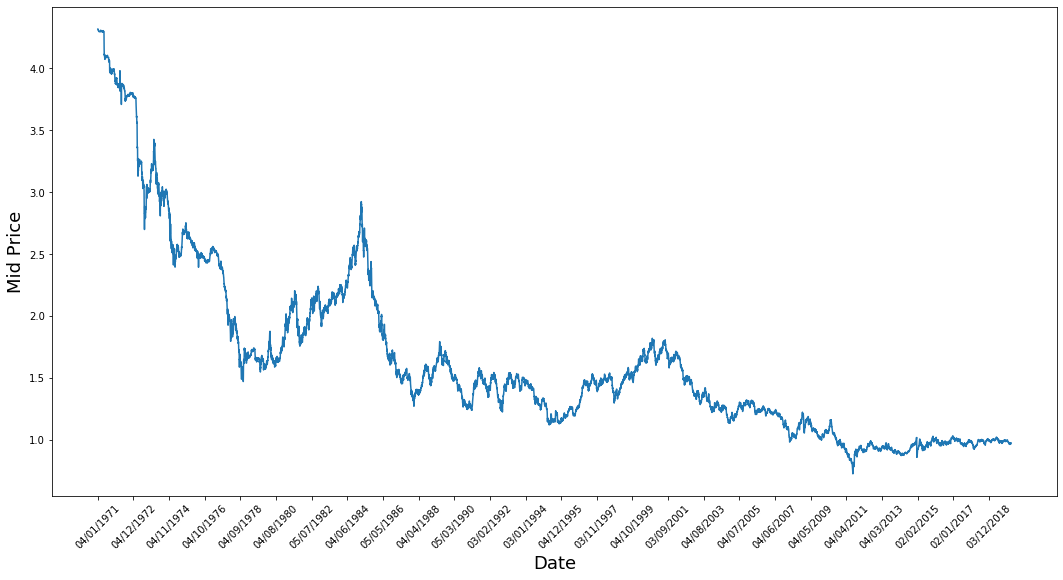

In [3]:
plt.figure(figsize = (18,9))
# plot mid price
plt.plot(range(df.shape[0]),(df['low']+df['high'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [4]:
high_prices = df.loc[:,'high'].to_numpy()
low_prices = df.loc[:,'low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0
print(mid_prices)

[4.318   4.3117  4.3113  ... 0.9713  0.9744  0.97605]


(11000, 1)


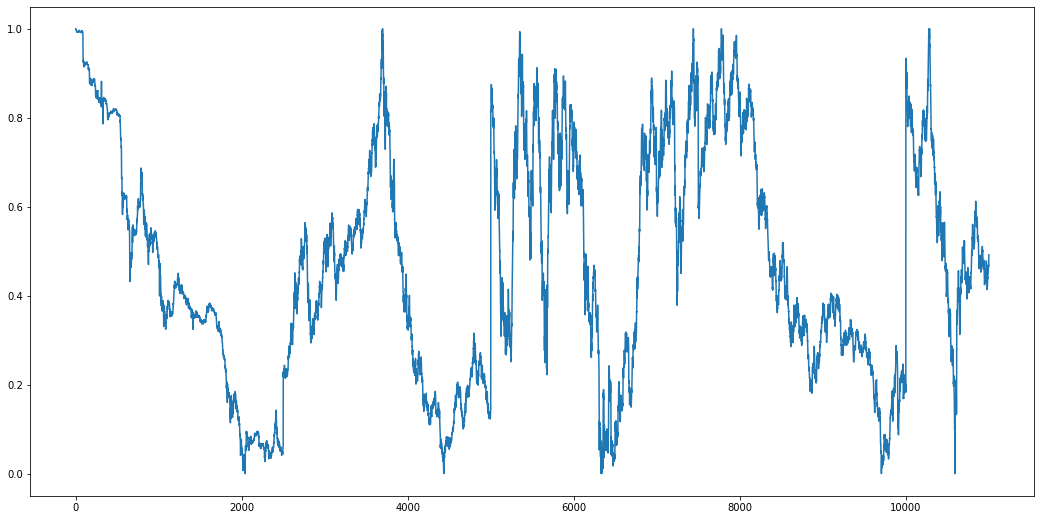

In [5]:
train_data = mid_prices[:11000]
test_data = mid_prices[11000:]
# Scale the data to be between 0 and 1
# When scaling remember! You normalize both test and train data with respect to training data
# Because you are not supposed to have access to test data
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

# Train the Scaler with training data and smooth data
smoothing_window_size = 2500
for di in range(0,10000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
    train_data[di:di+smoothing_window_size,:] = scaler.transform(train_data[di:di+smoothing_window_size,:])
    
# You normalize the last bit of remaining data
scaler.fit(train_data[di+smoothing_window_size:,:])
train_data[di+smoothing_window_size:,:] = scaler.transform(train_data[di+smoothing_window_size:,:])

plt.figure(figsize = (18,9))
plt.plot(train_data)
print(train_data.shape)

In [6]:
# Now perform exponential moving average smoothing
# So the data will have a smoother curve than the original ragged data
EMA = 0.0
gamma = 0.1
for ti in range(11000):
  EMA = gamma*train_data[ti] + (1-gamma)*EMA
  train_data[ti] = EMA

# Used for visualization and test purposes
all_mid_data = np.concatenate([train_data,test_data],axis=0)

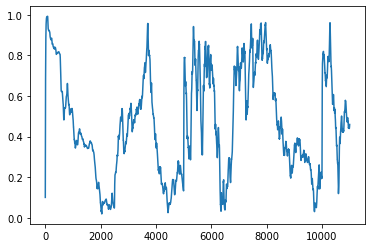

In [7]:
plt.plot(train_data)
train_data = train_data.reshape(11000, 1)

In [8]:
generator = TimeseriesGenerator(train_data, train_data, length=30, batch_size=1)
print(len(generator))

10970


In [9]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=20, return_sequences=False, activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.Dense(1))
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mae')

model.fit_generator(generator, steps_per_epoch=1, epochs=10970, verbose=2)

Epoch 1/10970
1/1 - 0s - loss: 0.0584
Epoch 2/10970
1/1 - 0s - loss: 0.0261
Epoch 3/10970
1/1 - 0s - loss: 0.2980
Epoch 4/10970
1/1 - 0s - loss: 0.3370
Epoch 5/10970
1/1 - 0s - loss: 0.2586
Epoch 6/10970
1/1 - 0s - loss: 0.2814
Epoch 7/10970
1/1 - 0s - loss: 0.0544
Epoch 8/10970
1/1 - 0s - loss: 0.2256
Epoch 9/10970
1/1 - 0s - loss: 0.3319
Epoch 10/10970
1/1 - 0s - loss: 0.1659
Epoch 11/10970
1/1 - 0s - loss: 0.3871
Epoch 12/10970
1/1 - 0s - loss: 0.3560
Epoch 13/10970
1/1 - 0s - loss: 0.3331
Epoch 14/10970
1/1 - 0s - loss: 0.1931
Epoch 15/10970
1/1 - 0s - loss: 0.1052
Epoch 16/10970
1/1 - 0s - loss: 0.3221
Epoch 17/10970
1/1 - 0s - loss: 0.2024
Epoch 18/10970
1/1 - 0s - loss: 0.3493
Epoch 19/10970
1/1 - 0s - loss: 0.0165
Epoch 20/10970
1/1 - 0s - loss: 0.5693
Epoch 21/10970
1/1 - 0s - loss: 0.2630
Epoch 22/10970
1/1 - 0s - loss: 0.2447
Epoch 23/10970
1/1 - 0s - loss: 0.0764
Epoch 24/10970
1/1 - 0s - loss: 0.6621
Epoch 25/10970
1/1 - 0s - loss: 0.0255
Epoch 26/10970
1/1 - 0s - loss: 0.

Epoch 209/10970
1/1 - 0s - loss: 0.0228
Epoch 210/10970
1/1 - 0s - loss: 0.0202
Epoch 211/10970
1/1 - 0s - loss: 0.0312
Epoch 212/10970
1/1 - 0s - loss: 0.0609
Epoch 213/10970
1/1 - 0s - loss: 0.0091
Epoch 214/10970
1/1 - 0s - loss: 0.0143
Epoch 215/10970
1/1 - 0s - loss: 0.0393
Epoch 216/10970
1/1 - 0s - loss: 0.0071
Epoch 217/10970
1/1 - 0s - loss: 0.0067
Epoch 218/10970
1/1 - 0s - loss: 0.0580
Epoch 219/10970
1/1 - 0s - loss: 0.0060
Epoch 220/10970
1/1 - 0s - loss: 0.0702
Epoch 221/10970
1/1 - 0s - loss: 0.0079
Epoch 222/10970
1/1 - 0s - loss: 0.0118
Epoch 223/10970
1/1 - 0s - loss: 0.0350
Epoch 224/10970
1/1 - 0s - loss: 0.0474
Epoch 225/10970
1/1 - 0s - loss: 0.0058
Epoch 226/10970
1/1 - 0s - loss: 0.0531
Epoch 227/10970
1/1 - 0s - loss: 0.0190
Epoch 228/10970
1/1 - 0s - loss: 0.0386
Epoch 229/10970
1/1 - 0s - loss: 0.0100
Epoch 230/10970
1/1 - 0s - loss: 0.0316
Epoch 231/10970
1/1 - 0s - loss: 0.0301
Epoch 232/10970
1/1 - 0s - loss: 0.0486
Epoch 233/10970
1/1 - 0s - loss: 0.0356


Epoch 413/10970
1/1 - 0s - loss: 0.0048
Epoch 414/10970
1/1 - 0s - loss: 0.0184
Epoch 415/10970
1/1 - 0s - loss: 0.0102
Epoch 416/10970
1/1 - 0s - loss: 1.2637e-04
Epoch 417/10970
1/1 - 0s - loss: 0.0263
Epoch 418/10970
1/1 - 0s - loss: 0.0045
Epoch 419/10970
1/1 - 0s - loss: 0.0103
Epoch 420/10970
1/1 - 0s - loss: 0.0012
Epoch 421/10970
1/1 - 0s - loss: 0.0943
Epoch 422/10970
1/1 - 0s - loss: 0.0106
Epoch 423/10970
1/1 - 0s - loss: 0.0121
Epoch 424/10970
1/1 - 0s - loss: 0.0236
Epoch 425/10970
1/1 - 0s - loss: 0.0204
Epoch 426/10970
1/1 - 0s - loss: 0.0118
Epoch 427/10970
1/1 - 0s - loss: 0.0259
Epoch 428/10970
1/1 - 0s - loss: 0.0102
Epoch 429/10970
1/1 - 0s - loss: 0.0161
Epoch 430/10970
1/1 - 0s - loss: 0.0011
Epoch 431/10970
1/1 - 0s - loss: 0.0056
Epoch 432/10970
1/1 - 0s - loss: 0.0175
Epoch 433/10970
1/1 - 0s - loss: 0.0038
Epoch 434/10970
1/1 - 0s - loss: 4.9025e-05
Epoch 435/10970
1/1 - 0s - loss: 0.0079
Epoch 436/10970
1/1 - 0s - loss: 0.0449
Epoch 437/10970
1/1 - 0s - loss:

Epoch 617/10970
1/1 - 0s - loss: 0.0123
Epoch 618/10970
1/1 - 0s - loss: 0.0140
Epoch 619/10970
1/1 - 0s - loss: 8.9204e-04
Epoch 620/10970
1/1 - 0s - loss: 0.0018
Epoch 621/10970
1/1 - 0s - loss: 0.0432
Epoch 622/10970
1/1 - 0s - loss: 0.0075
Epoch 623/10970
1/1 - 0s - loss: 0.0211
Epoch 624/10970
1/1 - 0s - loss: 0.0068
Epoch 625/10970
1/1 - 0s - loss: 0.0490
Epoch 626/10970
1/1 - 0s - loss: 0.0038
Epoch 627/10970
1/1 - 0s - loss: 0.0091
Epoch 628/10970
1/1 - 0s - loss: 0.0156
Epoch 629/10970
1/1 - 0s - loss: 0.0041
Epoch 630/10970
1/1 - 0s - loss: 9.9844e-04
Epoch 631/10970
1/1 - 0s - loss: 0.0462
Epoch 632/10970
1/1 - 0s - loss: 0.0130
Epoch 633/10970
1/1 - 0s - loss: 0.0210
Epoch 634/10970
1/1 - 0s - loss: 0.0028
Epoch 635/10970
1/1 - 0s - loss: 0.0637
Epoch 636/10970
1/1 - 0s - loss: 0.0402
Epoch 637/10970
1/1 - 0s - loss: 0.0113
Epoch 638/10970
1/1 - 0s - loss: 0.0469
Epoch 639/10970
1/1 - 0s - loss: 0.0242
Epoch 640/10970
1/1 - 0s - loss: 0.0209
Epoch 641/10970
1/1 - 0s - loss:

1/1 - 0s - loss: 0.0117
Epoch 822/10970
1/1 - 0s - loss: 0.0053
Epoch 823/10970
1/1 - 0s - loss: 0.0176
Epoch 824/10970
1/1 - 0s - loss: 0.0125
Epoch 825/10970
1/1 - 0s - loss: 0.0066
Epoch 826/10970
1/1 - 0s - loss: 0.0092
Epoch 827/10970
1/1 - 0s - loss: 0.0057
Epoch 828/10970
1/1 - 0s - loss: 0.0064
Epoch 829/10970
1/1 - 0s - loss: 0.0015
Epoch 830/10970
1/1 - 0s - loss: 0.0165
Epoch 831/10970
1/1 - 0s - loss: 0.0057
Epoch 832/10970
1/1 - 0s - loss: 0.0036
Epoch 833/10970
1/1 - 0s - loss: 0.0131
Epoch 834/10970
1/1 - 0s - loss: 0.0140
Epoch 835/10970
1/1 - 0s - loss: 0.0199
Epoch 836/10970
1/1 - 0s - loss: 0.0027
Epoch 837/10970
1/1 - 0s - loss: 0.0142
Epoch 838/10970
1/1 - 0s - loss: 0.0087
Epoch 839/10970
1/1 - 0s - loss: 0.0088
Epoch 840/10970
1/1 - 0s - loss: 1.5014e-04
Epoch 841/10970
1/1 - 0s - loss: 0.0132
Epoch 842/10970
1/1 - 0s - loss: 6.1634e-04
Epoch 843/10970
1/1 - 0s - loss: 0.0160
Epoch 844/10970
1/1 - 0s - loss: 0.0182
Epoch 845/10970
1/1 - 0s - loss: 0.0218
Epoch 84

Epoch 1025/10970
1/1 - 0s - loss: 0.0092
Epoch 1026/10970
1/1 - 0s - loss: 0.0276
Epoch 1027/10970
1/1 - 0s - loss: 0.0016
Epoch 1028/10970
1/1 - 0s - loss: 3.2055e-04
Epoch 1029/10970
1/1 - 0s - loss: 3.2800e-04
Epoch 1030/10970
1/1 - 0s - loss: 0.0047
Epoch 1031/10970
1/1 - 0s - loss: 0.0330
Epoch 1032/10970
1/1 - 0s - loss: 0.0022
Epoch 1033/10970
1/1 - 0s - loss: 0.0249
Epoch 1034/10970
1/1 - 0s - loss: 0.0040
Epoch 1035/10970
1/1 - 0s - loss: 0.0037
Epoch 1036/10970
1/1 - 0s - loss: 0.0023
Epoch 1037/10970
1/1 - 0s - loss: 0.0153
Epoch 1038/10970
1/1 - 0s - loss: 0.0263
Epoch 1039/10970
1/1 - 0s - loss: 0.0105
Epoch 1040/10970
1/1 - 0s - loss: 0.0046
Epoch 1041/10970
1/1 - 0s - loss: 0.0232
Epoch 1042/10970
1/1 - 0s - loss: 0.0047
Epoch 1043/10970
1/1 - 0s - loss: 0.0150
Epoch 1044/10970
1/1 - 0s - loss: 0.0085
Epoch 1045/10970
1/1 - 0s - loss: 0.0027
Epoch 1046/10970
1/1 - 0s - loss: 0.0325
Epoch 1047/10970
1/1 - 0s - loss: 0.0139
Epoch 1048/10970
1/1 - 0s - loss: 0.0051
Epoch 10

1/1 - 0s - loss: 0.0242
Epoch 1224/10970
1/1 - 0s - loss: 0.0161
Epoch 1225/10970
1/1 - 0s - loss: 0.0183
Epoch 1226/10970
1/1 - 0s - loss: 0.0497
Epoch 1227/10970
1/1 - 0s - loss: 0.0289
Epoch 1228/10970
1/1 - 0s - loss: 0.0056
Epoch 1229/10970
1/1 - 0s - loss: 0.0096
Epoch 1230/10970
1/1 - 0s - loss: 0.0212
Epoch 1231/10970
1/1 - 0s - loss: 0.0070
Epoch 1232/10970
1/1 - 0s - loss: 0.0039
Epoch 1233/10970
1/1 - 0s - loss: 0.0204
Epoch 1234/10970
1/1 - 0s - loss: 9.9332e-04
Epoch 1235/10970
1/1 - 0s - loss: 0.0181
Epoch 1236/10970
1/1 - 0s - loss: 0.0190
Epoch 1237/10970
1/1 - 0s - loss: 0.0249
Epoch 1238/10970
1/1 - 0s - loss: 0.0078
Epoch 1239/10970
1/1 - 0s - loss: 0.0289
Epoch 1240/10970
1/1 - 0s - loss: 5.4890e-04
Epoch 1241/10970
1/1 - 0s - loss: 0.0067
Epoch 1242/10970
1/1 - 0s - loss: 0.0021
Epoch 1243/10970
1/1 - 0s - loss: 0.0196
Epoch 1244/10970
1/1 - 0s - loss: 0.0572
Epoch 1245/10970
1/1 - 0s - loss: 0.0073
Epoch 1246/10970
1/1 - 0s - loss: 0.0258
Epoch 1247/10970
1/1 - 0s

Epoch 1422/10970
1/1 - 0s - loss: 0.0034
Epoch 1423/10970
1/1 - 0s - loss: 0.0126
Epoch 1424/10970
1/1 - 0s - loss: 0.0048
Epoch 1425/10970
1/1 - 0s - loss: 0.0023
Epoch 1426/10970
1/1 - 0s - loss: 0.0078
Epoch 1427/10970
1/1 - 0s - loss: 0.0072
Epoch 1428/10970
1/1 - 0s - loss: 0.0136
Epoch 1429/10970
1/1 - 0s - loss: 0.0171
Epoch 1430/10970
1/1 - 0s - loss: 0.0160
Epoch 1431/10970
1/1 - 0s - loss: 0.0054
Epoch 1432/10970
1/1 - 0s - loss: 0.0100
Epoch 1433/10970
1/1 - 0s - loss: 0.0105
Epoch 1434/10970
1/1 - 0s - loss: 2.3305e-04
Epoch 1435/10970
1/1 - 0s - loss: 0.0057
Epoch 1436/10970
1/1 - 0s - loss: 0.0125
Epoch 1437/10970
1/1 - 0s - loss: 0.0401
Epoch 1438/10970
1/1 - 0s - loss: 0.0059
Epoch 1439/10970
1/1 - 0s - loss: 0.0163
Epoch 1440/10970
1/1 - 0s - loss: 0.0111
Epoch 1441/10970
1/1 - 0s - loss: 0.0247
Epoch 1442/10970
1/1 - 0s - loss: 0.0057
Epoch 1443/10970
1/1 - 0s - loss: 0.0104
Epoch 1444/10970
1/1 - 0s - loss: 0.0020
Epoch 1445/10970
1/1 - 0s - loss: 0.0274
Epoch 1446/1

Epoch 1621/10970
1/1 - 0s - loss: 0.0102
Epoch 1622/10970
1/1 - 0s - loss: 0.0051
Epoch 1623/10970
1/1 - 0s - loss: 0.0082
Epoch 1624/10970
1/1 - 0s - loss: 0.0014
Epoch 1625/10970
1/1 - 0s - loss: 0.0068
Epoch 1626/10970
1/1 - 0s - loss: 0.0074
Epoch 1627/10970
1/1 - 0s - loss: 0.0131
Epoch 1628/10970
1/1 - 0s - loss: 0.0087
Epoch 1629/10970
1/1 - 0s - loss: 0.0057
Epoch 1630/10970
1/1 - 0s - loss: 0.0213
Epoch 1631/10970
1/1 - 0s - loss: 0.0283
Epoch 1632/10970
1/1 - 0s - loss: 0.0109
Epoch 1633/10970
1/1 - 0s - loss: 0.0010
Epoch 1634/10970
1/1 - 0s - loss: 0.0069
Epoch 1635/10970
1/1 - 0s - loss: 0.0035
Epoch 1636/10970
1/1 - 0s - loss: 0.0099
Epoch 1637/10970
1/1 - 0s - loss: 0.0204
Epoch 1638/10970
1/1 - 0s - loss: 0.0025
Epoch 1639/10970
1/1 - 0s - loss: 0.0187
Epoch 1640/10970
1/1 - 0s - loss: 0.0125
Epoch 1641/10970
1/1 - 0s - loss: 0.0282
Epoch 1642/10970
1/1 - 0s - loss: 0.0281
Epoch 1643/10970
1/1 - 0s - loss: 0.0166
Epoch 1644/10970
1/1 - 0s - loss: 0.0196
Epoch 1645/10970

Epoch 1820/10970
1/1 - 0s - loss: 0.0020
Epoch 1821/10970
1/1 - 0s - loss: 0.0029
Epoch 1822/10970
1/1 - 0s - loss: 0.0077
Epoch 1823/10970
1/1 - 0s - loss: 0.0155
Epoch 1824/10970
1/1 - 0s - loss: 0.0041
Epoch 1825/10970
1/1 - 0s - loss: 0.0106
Epoch 1826/10970
1/1 - 0s - loss: 0.0105
Epoch 1827/10970
1/1 - 0s - loss: 0.0209
Epoch 1828/10970
1/1 - 0s - loss: 0.0146
Epoch 1829/10970
1/1 - 0s - loss: 0.0034
Epoch 1830/10970
1/1 - 0s - loss: 0.0016
Epoch 1831/10970
1/1 - 0s - loss: 0.0181
Epoch 1832/10970
1/1 - 0s - loss: 7.8917e-04
Epoch 1833/10970
1/1 - 0s - loss: 0.0211
Epoch 1834/10970
1/1 - 0s - loss: 0.0073
Epoch 1835/10970
1/1 - 0s - loss: 0.0303
Epoch 1836/10970
1/1 - 0s - loss: 9.9534e-04
Epoch 1837/10970
1/1 - 0s - loss: 0.0026
Epoch 1838/10970
1/1 - 0s - loss: 0.0046
Epoch 1839/10970
1/1 - 0s - loss: 0.0027
Epoch 1840/10970
1/1 - 0s - loss: 0.0060
Epoch 1841/10970
1/1 - 0s - loss: 0.0173
Epoch 1842/10970
1/1 - 0s - loss: 0.0456
Epoch 1843/10970
1/1 - 0s - loss: 0.0062
Epoch 18

Epoch 2019/10970
1/1 - 0s - loss: 3.2634e-04
Epoch 2020/10970
1/1 - 0s - loss: 0.0095
Epoch 2021/10970
1/1 - 0s - loss: 7.9989e-04
Epoch 2022/10970
1/1 - 0s - loss: 0.0090
Epoch 2023/10970
1/1 - 0s - loss: 0.0136
Epoch 2024/10970
1/1 - 0s - loss: 0.0200
Epoch 2025/10970
1/1 - 0s - loss: 0.0371
Epoch 2026/10970
1/1 - 0s - loss: 0.0056
Epoch 2027/10970
1/1 - 0s - loss: 0.0379
Epoch 2028/10970
1/1 - 0s - loss: 0.0028
Epoch 2029/10970
1/1 - 0s - loss: 0.0027
Epoch 2030/10970
1/1 - 0s - loss: 0.0081
Epoch 2031/10970
1/1 - 0s - loss: 0.0271
Epoch 2032/10970
1/1 - 0s - loss: 8.0550e-04
Epoch 2033/10970
1/1 - 0s - loss: 0.0112
Epoch 2034/10970
1/1 - 0s - loss: 0.0164
Epoch 2035/10970
1/1 - 0s - loss: 0.0121
Epoch 2036/10970
1/1 - 0s - loss: 0.0012
Epoch 2037/10970
1/1 - 0s - loss: 0.0050
Epoch 2038/10970
1/1 - 0s - loss: 0.0073
Epoch 2039/10970
1/1 - 0s - loss: 0.0040
Epoch 2040/10970
1/1 - 0s - loss: 0.0141
Epoch 2041/10970
1/1 - 0s - loss: 0.0026
Epoch 2042/10970
1/1 - 0s - loss: 0.0119
Epoc

1/1 - 0s - loss: 0.0063
Epoch 2218/10970
1/1 - 0s - loss: 0.0062
Epoch 2219/10970
1/1 - 0s - loss: 0.0089
Epoch 2220/10970
1/1 - 0s - loss: 0.0044
Epoch 2221/10970
1/1 - 0s - loss: 0.0030
Epoch 2222/10970
1/1 - 0s - loss: 0.0041
Epoch 2223/10970
1/1 - 0s - loss: 0.0062
Epoch 2224/10970
1/1 - 0s - loss: 0.0024
Epoch 2225/10970
1/1 - 0s - loss: 0.0140
Epoch 2226/10970
1/1 - 0s - loss: 0.0060
Epoch 2227/10970
1/1 - 0s - loss: 0.0136
Epoch 2228/10970
1/1 - 0s - loss: 0.0141
Epoch 2229/10970
1/1 - 0s - loss: 4.5817e-04
Epoch 2230/10970
1/1 - 0s - loss: 0.0383
Epoch 2231/10970
1/1 - 0s - loss: 0.0233
Epoch 2232/10970
1/1 - 0s - loss: 0.0090
Epoch 2233/10970
1/1 - 0s - loss: 0.0109
Epoch 2234/10970
1/1 - 0s - loss: 0.0035
Epoch 2235/10970
1/1 - 0s - loss: 0.0088
Epoch 2236/10970
1/1 - 0s - loss: 0.0062
Epoch 2237/10970
1/1 - 0s - loss: 0.0072
Epoch 2238/10970
1/1 - 0s - loss: 0.0060
Epoch 2239/10970
1/1 - 0s - loss: 0.0089
Epoch 2240/10970
1/1 - 0s - loss: 7.0052e-04
Epoch 2241/10970
1/1 - 0s

Epoch 2416/10970
1/1 - 0s - loss: 0.0041
Epoch 2417/10970
1/1 - 0s - loss: 0.0074
Epoch 2418/10970
1/1 - 0s - loss: 0.0145
Epoch 2419/10970
1/1 - 0s - loss: 0.0025
Epoch 2420/10970
1/1 - 0s - loss: 0.0173
Epoch 2421/10970
1/1 - 0s - loss: 0.0022
Epoch 2422/10970
1/1 - 0s - loss: 0.0029
Epoch 2423/10970
1/1 - 0s - loss: 9.6324e-04
Epoch 2424/10970
1/1 - 0s - loss: 0.0030
Epoch 2425/10970
1/1 - 0s - loss: 0.0028
Epoch 2426/10970
1/1 - 0s - loss: 0.0027
Epoch 2427/10970
1/1 - 0s - loss: 0.0017
Epoch 2428/10970
1/1 - 0s - loss: 0.0124
Epoch 2429/10970
1/1 - 0s - loss: 6.3312e-04
Epoch 2430/10970
1/1 - 0s - loss: 0.0044
Epoch 2431/10970
1/1 - 0s - loss: 0.0023
Epoch 2432/10970
1/1 - 0s - loss: 0.0103
Epoch 2433/10970
1/1 - 0s - loss: 1.6099e-04
Epoch 2434/10970
1/1 - 0s - loss: 0.0200
Epoch 2435/10970
1/1 - 0s - loss: 0.0145
Epoch 2436/10970
1/1 - 0s - loss: 0.0161
Epoch 2437/10970
1/1 - 0s - loss: 0.0212
Epoch 2438/10970
1/1 - 0s - loss: 0.0298
Epoch 2439/10970
1/1 - 0s - loss: 0.0063
Epoc

Epoch 2614/10970
1/1 - 0s - loss: 0.0044
Epoch 2615/10970
1/1 - 0s - loss: 0.0099
Epoch 2616/10970
1/1 - 0s - loss: 0.0029
Epoch 2617/10970
1/1 - 0s - loss: 0.0064
Epoch 2618/10970
1/1 - 0s - loss: 0.0104
Epoch 2619/10970
1/1 - 0s - loss: 0.0103
Epoch 2620/10970
1/1 - 0s - loss: 0.0032
Epoch 2621/10970
1/1 - 0s - loss: 0.0030
Epoch 2622/10970
1/1 - 0s - loss: 0.0073
Epoch 2623/10970
1/1 - 0s - loss: 1.7446e-04
Epoch 2624/10970
1/1 - 0s - loss: 0.0111
Epoch 2625/10970
1/1 - 0s - loss: 0.0036
Epoch 2626/10970
1/1 - 0s - loss: 0.0049
Epoch 2627/10970
1/1 - 0s - loss: 0.0099
Epoch 2628/10970
1/1 - 0s - loss: 0.0032
Epoch 2629/10970
1/1 - 0s - loss: 0.0064
Epoch 2630/10970
1/1 - 0s - loss: 0.0018
Epoch 2631/10970
1/1 - 0s - loss: 0.0011
Epoch 2632/10970
1/1 - 0s - loss: 0.0047
Epoch 2633/10970
1/1 - 0s - loss: 0.0088
Epoch 2634/10970
1/1 - 0s - loss: 0.0029
Epoch 2635/10970
1/1 - 0s - loss: 0.0053
Epoch 2636/10970
1/1 - 0s - loss: 0.0021
Epoch 2637/10970
1/1 - 0s - loss: 0.0107
Epoch 2638/1

Epoch 2813/10970
1/1 - 0s - loss: 3.3164e-04
Epoch 2814/10970
1/1 - 0s - loss: 0.0021
Epoch 2815/10970
1/1 - 0s - loss: 0.0159
Epoch 2816/10970
1/1 - 0s - loss: 0.0020
Epoch 2817/10970
1/1 - 0s - loss: 0.0062
Epoch 2818/10970
1/1 - 0s - loss: 0.0022
Epoch 2819/10970
1/1 - 0s - loss: 0.0012
Epoch 2820/10970
1/1 - 0s - loss: 0.0037
Epoch 2821/10970
1/1 - 0s - loss: 0.0102
Epoch 2822/10970
1/1 - 0s - loss: 3.3021e-04
Epoch 2823/10970
1/1 - 0s - loss: 0.0022
Epoch 2824/10970
1/1 - 0s - loss: 0.0016
Epoch 2825/10970
1/1 - 0s - loss: 0.0029
Epoch 2826/10970
1/1 - 0s - loss: 0.0047
Epoch 2827/10970
1/1 - 0s - loss: 0.0174
Epoch 2828/10970
1/1 - 0s - loss: 0.0129
Epoch 2829/10970
1/1 - 0s - loss: 0.0014
Epoch 2830/10970
1/1 - 0s - loss: 0.0297
Epoch 2831/10970
1/1 - 0s - loss: 7.5936e-05
Epoch 2832/10970
1/1 - 0s - loss: 0.0045
Epoch 2833/10970
1/1 - 0s - loss: 0.0104
Epoch 2834/10970
1/1 - 0s - loss: 8.1962e-04
Epoch 2835/10970
1/1 - 0s - loss: 0.0038
Epoch 2836/10970
1/1 - 0s - loss: 0.0051


Epoch 3011/10970
1/1 - 0s - loss: 0.0040
Epoch 3012/10970
1/1 - 0s - loss: 0.0083
Epoch 3013/10970
1/1 - 0s - loss: 0.0196
Epoch 3014/10970
1/1 - 0s - loss: 0.0112
Epoch 3015/10970
1/1 - 0s - loss: 0.0072
Epoch 3016/10970
1/1 - 0s - loss: 0.0094
Epoch 3017/10970
1/1 - 0s - loss: 0.0026
Epoch 3018/10970
1/1 - 0s - loss: 0.0074
Epoch 3019/10970
1/1 - 0s - loss: 0.0152
Epoch 3020/10970
1/1 - 0s - loss: 0.0041
Epoch 3021/10970
1/1 - 0s - loss: 0.0022
Epoch 3022/10970
1/1 - 0s - loss: 3.4642e-04
Epoch 3023/10970
1/1 - 0s - loss: 0.0108
Epoch 3024/10970
1/1 - 0s - loss: 0.0069
Epoch 3025/10970
1/1 - 0s - loss: 0.0192
Epoch 3026/10970
1/1 - 0s - loss: 0.0101
Epoch 3027/10970
1/1 - 0s - loss: 0.0384
Epoch 3028/10970
1/1 - 0s - loss: 0.0247
Epoch 3029/10970
1/1 - 0s - loss: 0.0155
Epoch 3030/10970
1/1 - 0s - loss: 0.0159
Epoch 3031/10970
1/1 - 0s - loss: 0.0159
Epoch 3032/10970
1/1 - 0s - loss: 0.0022
Epoch 3033/10970
1/1 - 0s - loss: 0.0106
Epoch 3034/10970
1/1 - 0s - loss: 0.0096
Epoch 3035/1

Epoch 3210/10970
1/1 - 0s - loss: 0.0019
Epoch 3211/10970
1/1 - 0s - loss: 0.0094
Epoch 3212/10970
1/1 - 0s - loss: 0.0030
Epoch 3213/10970
1/1 - 0s - loss: 0.0056
Epoch 3214/10970
1/1 - 0s - loss: 0.0092
Epoch 3215/10970
1/1 - 0s - loss: 0.0013
Epoch 3216/10970
1/1 - 0s - loss: 3.2011e-04
Epoch 3217/10970
1/1 - 0s - loss: 0.0016
Epoch 3218/10970
1/1 - 0s - loss: 5.5650e-04
Epoch 3219/10970
1/1 - 0s - loss: 0.0048
Epoch 3220/10970
1/1 - 0s - loss: 0.0184
Epoch 3221/10970
1/1 - 0s - loss: 0.0106
Epoch 3222/10970
1/1 - 0s - loss: 0.0041
Epoch 3223/10970
1/1 - 0s - loss: 0.0089
Epoch 3224/10970
1/1 - 0s - loss: 0.0034
Epoch 3225/10970
1/1 - 0s - loss: 0.0345
Epoch 3226/10970
1/1 - 0s - loss: 0.0070
Epoch 3227/10970
1/1 - 0s - loss: 0.0112
Epoch 3228/10970
1/1 - 0s - loss: 0.0152
Epoch 3229/10970
1/1 - 0s - loss: 0.0069
Epoch 3230/10970
1/1 - 0s - loss: 0.0169
Epoch 3231/10970
1/1 - 0s - loss: 0.0061
Epoch 3232/10970
1/1 - 0s - loss: 3.9077e-04
Epoch 3233/10970
1/1 - 0s - loss: 0.0086
Epoc

Epoch 3408/10970
1/1 - 0s - loss: 4.4075e-04
Epoch 3409/10970
1/1 - 0s - loss: 0.0074
Epoch 3410/10970
1/1 - 0s - loss: 6.2078e-05
Epoch 3411/10970
1/1 - 0s - loss: 0.0064
Epoch 3412/10970
1/1 - 0s - loss: 0.0093
Epoch 3413/10970
1/1 - 0s - loss: 9.9508e-04
Epoch 3414/10970
1/1 - 0s - loss: 0.0244
Epoch 3415/10970
1/1 - 0s - loss: 0.0149
Epoch 3416/10970
1/1 - 0s - loss: 0.0331
Epoch 3417/10970
1/1 - 0s - loss: 0.0025
Epoch 3418/10970
1/1 - 0s - loss: 0.0225
Epoch 3419/10970
1/1 - 0s - loss: 0.0110
Epoch 3420/10970
1/1 - 0s - loss: 0.0156
Epoch 3421/10970
1/1 - 0s - loss: 0.0089
Epoch 3422/10970
1/1 - 0s - loss: 3.8373e-04
Epoch 3423/10970
1/1 - 0s - loss: 0.0083
Epoch 3424/10970
1/1 - 0s - loss: 0.0110
Epoch 3425/10970
1/1 - 0s - loss: 0.0221
Epoch 3426/10970
1/1 - 0s - loss: 0.0218
Epoch 3427/10970
1/1 - 0s - loss: 0.0218
Epoch 3428/10970
1/1 - 0s - loss: 0.0160
Epoch 3429/10970
1/1 - 0s - loss: 0.0158
Epoch 3430/10970
1/1 - 0s - loss: 0.0295
Epoch 3431/10970
1/1 - 0s - loss: 0.0034


Epoch 3606/10970
1/1 - 0s - loss: 0.0266
Epoch 3607/10970
1/1 - 0s - loss: 0.0115
Epoch 3608/10970
1/1 - 0s - loss: 0.0245
Epoch 3609/10970
1/1 - 0s - loss: 0.0162
Epoch 3610/10970
1/1 - 0s - loss: 0.0132
Epoch 3611/10970
1/1 - 0s - loss: 0.0097
Epoch 3612/10970
1/1 - 0s - loss: 0.0017
Epoch 3613/10970
1/1 - 0s - loss: 0.0166
Epoch 3614/10970
1/1 - 0s - loss: 0.0140
Epoch 3615/10970
1/1 - 0s - loss: 0.0072
Epoch 3616/10970
1/1 - 0s - loss: 0.0036
Epoch 3617/10970
1/1 - 0s - loss: 0.0265
Epoch 3618/10970
1/1 - 0s - loss: 0.0024
Epoch 3619/10970
1/1 - 0s - loss: 0.0146
Epoch 3620/10970
1/1 - 0s - loss: 0.0239
Epoch 3621/10970
1/1 - 0s - loss: 0.0209
Epoch 3622/10970
1/1 - 0s - loss: 0.0081
Epoch 3623/10970
1/1 - 0s - loss: 0.0102
Epoch 3624/10970
1/1 - 0s - loss: 0.0076
Epoch 3625/10970
1/1 - 0s - loss: 0.0107
Epoch 3626/10970
1/1 - 0s - loss: 0.0045
Epoch 3627/10970
1/1 - 0s - loss: 0.0120
Epoch 3628/10970
1/1 - 0s - loss: 0.0144
Epoch 3629/10970
1/1 - 0s - loss: 0.0041
Epoch 3630/10970

1/1 - 0s - loss: 0.0099
Epoch 3805/10970
1/1 - 0s - loss: 0.0064
Epoch 3806/10970
1/1 - 0s - loss: 9.1188e-04
Epoch 3807/10970
1/1 - 0s - loss: 0.0030
Epoch 3808/10970
1/1 - 0s - loss: 0.0147
Epoch 3809/10970
1/1 - 0s - loss: 0.0069
Epoch 3810/10970
1/1 - 0s - loss: 0.0013
Epoch 3811/10970
1/1 - 0s - loss: 0.0120
Epoch 3812/10970
1/1 - 0s - loss: 0.0049
Epoch 3813/10970
1/1 - 0s - loss: 0.0096
Epoch 3814/10970
1/1 - 0s - loss: 0.0085
Epoch 3815/10970
1/1 - 0s - loss: 0.0024
Epoch 3816/10970
1/1 - 0s - loss: 0.0113
Epoch 3817/10970
1/1 - 0s - loss: 4.7565e-05
Epoch 3818/10970
1/1 - 0s - loss: 0.0038
Epoch 3819/10970
1/1 - 0s - loss: 0.0064
Epoch 3820/10970
1/1 - 0s - loss: 0.0210
Epoch 3821/10970
1/1 - 0s - loss: 0.0070
Epoch 3822/10970
1/1 - 0s - loss: 0.0087
Epoch 3823/10970
1/1 - 0s - loss: 0.0037
Epoch 3824/10970
1/1 - 0s - loss: 0.0050
Epoch 3825/10970
1/1 - 0s - loss: 0.0085
Epoch 3826/10970
1/1 - 0s - loss: 0.0048
Epoch 3827/10970
1/1 - 0s - loss: 0.0072
Epoch 3828/10970
1/1 - 0s

Epoch 4003/10970
1/1 - 0s - loss: 0.0110
Epoch 4004/10970
1/1 - 0s - loss: 0.0038
Epoch 4005/10970
1/1 - 0s - loss: 0.0086
Epoch 4006/10970
1/1 - 0s - loss: 0.0135
Epoch 4007/10970
1/1 - 0s - loss: 0.0124
Epoch 4008/10970
1/1 - 0s - loss: 0.0013
Epoch 4009/10970
1/1 - 0s - loss: 0.0048
Epoch 4010/10970
1/1 - 0s - loss: 0.0153
Epoch 4011/10970
1/1 - 0s - loss: 0.0058
Epoch 4012/10970
1/1 - 0s - loss: 0.0090
Epoch 4013/10970
1/1 - 0s - loss: 0.0027
Epoch 4014/10970
1/1 - 0s - loss: 0.0041
Epoch 4015/10970
1/1 - 0s - loss: 0.0045
Epoch 4016/10970
1/1 - 0s - loss: 0.0074
Epoch 4017/10970
1/1 - 0s - loss: 0.0032
Epoch 4018/10970
1/1 - 0s - loss: 0.0065
Epoch 4019/10970
1/1 - 0s - loss: 0.0121
Epoch 4020/10970
1/1 - 0s - loss: 0.0023
Epoch 4021/10970
1/1 - 0s - loss: 0.0032
Epoch 4022/10970
1/1 - 0s - loss: 0.0070
Epoch 4023/10970
1/1 - 0s - loss: 0.0078
Epoch 4024/10970
1/1 - 0s - loss: 0.0025
Epoch 4025/10970
1/1 - 0s - loss: 0.0021
Epoch 4026/10970
1/1 - 0s - loss: 0.0026
Epoch 4027/10970

Epoch 4202/10970
1/1 - 0s - loss: 0.0012
Epoch 4203/10970
1/1 - 0s - loss: 0.0216
Epoch 4204/10970
1/1 - 0s - loss: 0.0129
Epoch 4205/10970
1/1 - 0s - loss: 0.0046
Epoch 4206/10970
1/1 - 0s - loss: 0.0228
Epoch 4207/10970
1/1 - 0s - loss: 3.5384e-04
Epoch 4208/10970
1/1 - 0s - loss: 0.0169
Epoch 4209/10970
1/1 - 0s - loss: 0.0075
Epoch 4210/10970
1/1 - 0s - loss: 0.0092
Epoch 4211/10970
1/1 - 0s - loss: 0.0127
Epoch 4212/10970
1/1 - 0s - loss: 0.0158
Epoch 4213/10970
1/1 - 0s - loss: 0.0046
Epoch 4214/10970
1/1 - 0s - loss: 0.0134
Epoch 4215/10970
1/1 - 0s - loss: 0.0111
Epoch 4216/10970
1/1 - 0s - loss: 0.0032
Epoch 4217/10970
1/1 - 0s - loss: 0.0063
Epoch 4218/10970
1/1 - 0s - loss: 0.0066
Epoch 4219/10970
1/1 - 0s - loss: 0.0089
Epoch 4220/10970
1/1 - 0s - loss: 0.0091
Epoch 4221/10970
1/1 - 0s - loss: 0.0137
Epoch 4222/10970
1/1 - 0s - loss: 0.0186
Epoch 4223/10970
1/1 - 0s - loss: 0.0053
Epoch 4224/10970
1/1 - 0s - loss: 0.0059
Epoch 4225/10970
1/1 - 0s - loss: 0.0048
Epoch 4226/1

Epoch 4400/10970
1/1 - 0s - loss: 0.0060
Epoch 4401/10970
1/1 - 0s - loss: 0.0133
Epoch 4402/10970
1/1 - 0s - loss: 0.0123
Epoch 4403/10970
1/1 - 0s - loss: 0.0030
Epoch 4404/10970
1/1 - 0s - loss: 0.0076
Epoch 4405/10970
1/1 - 0s - loss: 4.3362e-04
Epoch 4406/10970
1/1 - 0s - loss: 0.0103
Epoch 4407/10970
1/1 - 0s - loss: 0.0219
Epoch 4408/10970
1/1 - 0s - loss: 0.0175
Epoch 4409/10970
1/1 - 0s - loss: 0.0443
Epoch 4410/10970
1/1 - 0s - loss: 0.0160
Epoch 4411/10970
1/1 - 0s - loss: 0.0236
Epoch 4412/10970
1/1 - 0s - loss: 0.0030
Epoch 4413/10970
1/1 - 0s - loss: 0.0152
Epoch 4414/10970
1/1 - 0s - loss: 0.0012
Epoch 4415/10970
1/1 - 0s - loss: 0.0108
Epoch 4416/10970
1/1 - 0s - loss: 7.6294e-06
Epoch 4417/10970
1/1 - 0s - loss: 9.7363e-04
Epoch 4418/10970
1/1 - 0s - loss: 0.0036
Epoch 4419/10970
1/1 - 0s - loss: 0.0022
Epoch 4420/10970
1/1 - 0s - loss: 0.0039
Epoch 4421/10970
1/1 - 0s - loss: 0.0149
Epoch 4422/10970
1/1 - 0s - loss: 5.7089e-04
Epoch 4423/10970
1/1 - 0s - loss: 0.0085


1/1 - 0s - loss: 0.0034
Epoch 4599/10970
1/1 - 0s - loss: 0.0053
Epoch 4600/10970
1/1 - 0s - loss: 0.0026
Epoch 4601/10970
1/1 - 0s - loss: 0.0120
Epoch 4602/10970
1/1 - 0s - loss: 0.0153
Epoch 4603/10970
1/1 - 0s - loss: 0.0109
Epoch 4604/10970
1/1 - 0s - loss: 0.0035
Epoch 4605/10970
1/1 - 0s - loss: 6.6188e-04
Epoch 4606/10970
1/1 - 0s - loss: 0.0103
Epoch 4607/10970
1/1 - 0s - loss: 0.0104
Epoch 4608/10970
1/1 - 0s - loss: 0.0025
Epoch 4609/10970
1/1 - 0s - loss: 0.0032
Epoch 4610/10970
1/1 - 0s - loss: 0.0043
Epoch 4611/10970
1/1 - 0s - loss: 0.0070
Epoch 4612/10970
1/1 - 0s - loss: 0.0221
Epoch 4613/10970
1/1 - 0s - loss: 0.0108
Epoch 4614/10970
1/1 - 0s - loss: 0.0045
Epoch 4615/10970
1/1 - 0s - loss: 0.0245
Epoch 4616/10970
1/1 - 0s - loss: 0.0023
Epoch 4617/10970
1/1 - 0s - loss: 1.5746e-04
Epoch 4618/10970
1/1 - 0s - loss: 0.0023
Epoch 4619/10970
1/1 - 0s - loss: 0.0091
Epoch 4620/10970
1/1 - 0s - loss: 0.0130
Epoch 4621/10970
1/1 - 0s - loss: 0.0080
Epoch 4622/10970
1/1 - 0s

Epoch 4797/10970
1/1 - 0s - loss: 0.0080
Epoch 4798/10970
1/1 - 0s - loss: 0.0048
Epoch 4799/10970
1/1 - 0s - loss: 0.0053
Epoch 4800/10970
1/1 - 0s - loss: 8.6346e-04
Epoch 4801/10970
1/1 - 0s - loss: 0.0019
Epoch 4802/10970
1/1 - 0s - loss: 0.0061
Epoch 4803/10970
1/1 - 0s - loss: 0.0032
Epoch 4804/10970
1/1 - 0s - loss: 0.0205
Epoch 4805/10970
1/1 - 0s - loss: 0.0152
Epoch 4806/10970
1/1 - 0s - loss: 0.0119
Epoch 4807/10970
1/1 - 0s - loss: 0.0039
Epoch 4808/10970
1/1 - 0s - loss: 0.0042
Epoch 4809/10970
1/1 - 0s - loss: 0.0018
Epoch 4810/10970
1/1 - 0s - loss: 0.0067
Epoch 4811/10970
1/1 - 0s - loss: 0.0026
Epoch 4812/10970
1/1 - 0s - loss: 3.7867e-04
Epoch 4813/10970
1/1 - 0s - loss: 5.6258e-04
Epoch 4814/10970
1/1 - 0s - loss: 0.0015
Epoch 4815/10970
1/1 - 0s - loss: 0.0061
Epoch 4816/10970
1/1 - 0s - loss: 0.0050
Epoch 4817/10970
1/1 - 0s - loss: 0.0162
Epoch 4818/10970
1/1 - 0s - loss: 0.0236
Epoch 4819/10970
1/1 - 0s - loss: 0.0053
Epoch 4820/10970
1/1 - 0s - loss: 0.0013
Epoc

1/1 - 0s - loss: 0.0036
Epoch 4996/10970
1/1 - 0s - loss: 0.0105
Epoch 4997/10970
1/1 - 0s - loss: 0.0102
Epoch 4998/10970
1/1 - 0s - loss: 0.0147
Epoch 4999/10970
1/1 - 0s - loss: 0.0066
Epoch 5000/10970
1/1 - 0s - loss: 0.0118
Epoch 5001/10970
1/1 - 0s - loss: 0.0168
Epoch 5002/10970
1/1 - 0s - loss: 0.0086
Epoch 5003/10970
1/1 - 0s - loss: 0.0036
Epoch 5004/10970
1/1 - 0s - loss: 3.6043e-04
Epoch 5005/10970
1/1 - 0s - loss: 0.0011
Epoch 5006/10970
1/1 - 0s - loss: 0.0121
Epoch 5007/10970
1/1 - 0s - loss: 0.0026
Epoch 5008/10970
1/1 - 0s - loss: 5.2547e-04
Epoch 5009/10970
1/1 - 0s - loss: 0.0071
Epoch 5010/10970
1/1 - 0s - loss: 0.0075
Epoch 5011/10970
1/1 - 0s - loss: 0.0034
Epoch 5012/10970
1/1 - 0s - loss: 0.0032
Epoch 5013/10970
1/1 - 0s - loss: 4.9465e-04
Epoch 5014/10970
1/1 - 0s - loss: 0.0033
Epoch 5015/10970
1/1 - 0s - loss: 0.0054
Epoch 5016/10970
1/1 - 0s - loss: 0.0078
Epoch 5017/10970
1/1 - 0s - loss: 0.0014
Epoch 5018/10970
1/1 - 0s - loss: 0.0077
Epoch 5019/10970
1/1 

1/1 - 0s - loss: 1.8123e-04
Epoch 5194/10970
1/1 - 0s - loss: 0.0011
Epoch 5195/10970
1/1 - 0s - loss: 0.0015
Epoch 5196/10970
1/1 - 0s - loss: 0.0137
Epoch 5197/10970
1/1 - 0s - loss: 0.0049
Epoch 5198/10970
1/1 - 0s - loss: 0.0022
Epoch 5199/10970
1/1 - 0s - loss: 0.0043
Epoch 5200/10970
1/1 - 0s - loss: 0.0100
Epoch 5201/10970
1/1 - 0s - loss: 0.0026
Epoch 5202/10970
1/1 - 0s - loss: 0.0039
Epoch 5203/10970
1/1 - 0s - loss: 0.0137
Epoch 5204/10970
1/1 - 0s - loss: 0.0032
Epoch 5205/10970
1/1 - 0s - loss: 0.0053
Epoch 5206/10970
1/1 - 0s - loss: 0.0070
Epoch 5207/10970
1/1 - 0s - loss: 0.0037
Epoch 5208/10970
1/1 - 0s - loss: 0.0042
Epoch 5209/10970
1/1 - 0s - loss: 0.0036
Epoch 5210/10970
1/1 - 0s - loss: 0.0049
Epoch 5211/10970
1/1 - 0s - loss: 0.0061
Epoch 5212/10970
1/1 - 0s - loss: 0.0021
Epoch 5213/10970
1/1 - 0s - loss: 0.0042
Epoch 5214/10970
1/1 - 0s - loss: 0.0017
Epoch 5215/10970
1/1 - 0s - loss: 0.0045
Epoch 5216/10970
1/1 - 0s - loss: 0.0029
Epoch 5217/10970
1/1 - 0s - l

Epoch 5392/10970
1/1 - 0s - loss: 0.0052
Epoch 5393/10970
1/1 - 0s - loss: 0.0034
Epoch 5394/10970
1/1 - 0s - loss: 0.0081
Epoch 5395/10970
1/1 - 0s - loss: 0.0073
Epoch 5396/10970
1/1 - 0s - loss: 0.0093
Epoch 5397/10970
1/1 - 0s - loss: 0.0110
Epoch 5398/10970
1/1 - 0s - loss: 0.0154
Epoch 5399/10970
1/1 - 0s - loss: 0.0274
Epoch 5400/10970
1/1 - 0s - loss: 0.0059
Epoch 5401/10970
1/1 - 0s - loss: 0.0017
Epoch 5402/10970
1/1 - 0s - loss: 8.3759e-04
Epoch 5403/10970
1/1 - 0s - loss: 5.9077e-04
Epoch 5404/10970
1/1 - 0s - loss: 0.0017
Epoch 5405/10970
1/1 - 0s - loss: 0.0068
Epoch 5406/10970
1/1 - 0s - loss: 0.0035
Epoch 5407/10970
1/1 - 0s - loss: 0.0093
Epoch 5408/10970
1/1 - 0s - loss: 0.0011
Epoch 5409/10970
1/1 - 0s - loss: 0.0029
Epoch 5410/10970
1/1 - 0s - loss: 0.0109
Epoch 5411/10970
1/1 - 0s - loss: 0.0061
Epoch 5412/10970
1/1 - 0s - loss: 0.0073
Epoch 5413/10970
1/1 - 0s - loss: 0.0033
Epoch 5414/10970
1/1 - 0s - loss: 0.0023
Epoch 5415/10970
1/1 - 0s - loss: 0.0104
Epoch 54

Epoch 5590/10970
1/1 - 0s - loss: 0.0017
Epoch 5591/10970
1/1 - 0s - loss: 0.0011
Epoch 5592/10970
1/1 - 0s - loss: 0.0054
Epoch 5593/10970
1/1 - 0s - loss: 0.0061
Epoch 5594/10970
1/1 - 0s - loss: 0.0051
Epoch 5595/10970
1/1 - 0s - loss: 0.0020
Epoch 5596/10970
1/1 - 0s - loss: 2.6995e-04
Epoch 5597/10970
1/1 - 0s - loss: 0.0049
Epoch 5598/10970
1/1 - 0s - loss: 0.0015
Epoch 5599/10970
1/1 - 0s - loss: 0.0081
Epoch 5600/10970
1/1 - 0s - loss: 2.9027e-05
Epoch 5601/10970
1/1 - 0s - loss: 0.0120
Epoch 5602/10970
1/1 - 0s - loss: 0.0041
Epoch 5603/10970
1/1 - 0s - loss: 0.0104
Epoch 5604/10970
1/1 - 0s - loss: 0.0143
Epoch 5605/10970
1/1 - 0s - loss: 0.0098
Epoch 5606/10970
1/1 - 0s - loss: 0.0091
Epoch 5607/10970
1/1 - 0s - loss: 0.0012
Epoch 5608/10970
1/1 - 0s - loss: 0.0033
Epoch 5609/10970
1/1 - 0s - loss: 0.0085
Epoch 5610/10970
1/1 - 0s - loss: 0.0165
Epoch 5611/10970
1/1 - 0s - loss: 3.7354e-04
Epoch 5612/10970
1/1 - 0s - loss: 0.0025
Epoch 5613/10970
1/1 - 0s - loss: 0.0068
Epoc

1/1 - 0s - loss: 0.0073
Epoch 5788/10970
1/1 - 0s - loss: 0.0072
Epoch 5789/10970
1/1 - 0s - loss: 0.0206
Epoch 5790/10970
1/1 - 0s - loss: 0.0129
Epoch 5791/10970
1/1 - 0s - loss: 8.5843e-04
Epoch 5792/10970
1/1 - 0s - loss: 0.0020
Epoch 5793/10970
1/1 - 0s - loss: 0.0025
Epoch 5794/10970
1/1 - 0s - loss: 0.0136
Epoch 5795/10970
1/1 - 0s - loss: 0.0074
Epoch 5796/10970
1/1 - 0s - loss: 0.0100
Epoch 5797/10970
1/1 - 0s - loss: 0.0028
Epoch 5798/10970
1/1 - 0s - loss: 0.0012
Epoch 5799/10970
1/1 - 0s - loss: 0.0101
Epoch 5800/10970
1/1 - 0s - loss: 0.0116
Epoch 5801/10970
1/1 - 0s - loss: 0.0063
Epoch 5802/10970
1/1 - 0s - loss: 0.0026
Epoch 5803/10970
1/1 - 0s - loss: 0.0075
Epoch 5804/10970
1/1 - 0s - loss: 0.0059
Epoch 5805/10970
1/1 - 0s - loss: 0.0114
Epoch 5806/10970
1/1 - 0s - loss: 0.0025
Epoch 5807/10970
1/1 - 0s - loss: 0.0026
Epoch 5808/10970
1/1 - 0s - loss: 0.0038
Epoch 5809/10970
1/1 - 0s - loss: 0.0017
Epoch 5810/10970
1/1 - 0s - loss: 0.0059
Epoch 5811/10970
1/1 - 0s - l

Epoch 5986/10970
1/1 - 0s - loss: 0.0057
Epoch 5987/10970
1/1 - 0s - loss: 0.0171
Epoch 5988/10970
1/1 - 0s - loss: 0.0110
Epoch 5989/10970
1/1 - 0s - loss: 0.0114
Epoch 5990/10970
1/1 - 0s - loss: 0.0116
Epoch 5991/10970
1/1 - 0s - loss: 0.0172
Epoch 5992/10970
1/1 - 0s - loss: 0.0093
Epoch 5993/10970
1/1 - 0s - loss: 0.0119
Epoch 5994/10970
1/1 - 0s - loss: 0.0087
Epoch 5995/10970
1/1 - 0s - loss: 0.0025
Epoch 5996/10970
1/1 - 0s - loss: 0.0151
Epoch 5997/10970
1/1 - 0s - loss: 0.0109
Epoch 5998/10970
1/1 - 0s - loss: 0.0040
Epoch 5999/10970
1/1 - 0s - loss: 0.0088
Epoch 6000/10970
1/1 - 0s - loss: 0.0056
Epoch 6001/10970
1/1 - 0s - loss: 0.0073
Epoch 6002/10970
1/1 - 0s - loss: 0.0079
Epoch 6003/10970
1/1 - 0s - loss: 0.0082
Epoch 6004/10970
1/1 - 0s - loss: 0.0086
Epoch 6005/10970
1/1 - 0s - loss: 0.0156
Epoch 6006/10970
1/1 - 0s - loss: 0.0099
Epoch 6007/10970
1/1 - 0s - loss: 9.8747e-04
Epoch 6008/10970
1/1 - 0s - loss: 0.0048
Epoch 6009/10970
1/1 - 0s - loss: 0.0095
Epoch 6010/1

Epoch 6184/10970
1/1 - 0s - loss: 0.0098
Epoch 6185/10970
1/1 - 0s - loss: 0.0096
Epoch 6186/10970
1/1 - 0s - loss: 0.0034
Epoch 6187/10970
1/1 - 0s - loss: 1.8430e-04
Epoch 6188/10970
1/1 - 0s - loss: 0.0093
Epoch 6189/10970
1/1 - 0s - loss: 0.0038
Epoch 6190/10970
1/1 - 0s - loss: 0.0037
Epoch 6191/10970
1/1 - 0s - loss: 0.0015
Epoch 6192/10970
1/1 - 0s - loss: 0.0020
Epoch 6193/10970
1/1 - 0s - loss: 0.0019
Epoch 6194/10970
1/1 - 0s - loss: 0.0160
Epoch 6195/10970
1/1 - 0s - loss: 0.0070
Epoch 6196/10970
1/1 - 0s - loss: 0.0054
Epoch 6197/10970
1/1 - 0s - loss: 0.0101
Epoch 6198/10970
1/1 - 0s - loss: 0.0050
Epoch 6199/10970
1/1 - 0s - loss: 0.0026
Epoch 6200/10970
1/1 - 0s - loss: 5.5611e-04
Epoch 6201/10970
1/1 - 0s - loss: 0.0082
Epoch 6202/10970
1/1 - 0s - loss: 0.0045
Epoch 6203/10970
1/1 - 0s - loss: 0.0030
Epoch 6204/10970
1/1 - 0s - loss: 0.0074
Epoch 6205/10970
1/1 - 0s - loss: 3.8409e-04
Epoch 6206/10970
1/1 - 0s - loss: 0.0014
Epoch 6207/10970
1/1 - 0s - loss: 0.0128
Epoc

Epoch 6383/10970
1/1 - 0s - loss: 0.0152
Epoch 6384/10970
1/1 - 0s - loss: 0.0078
Epoch 6385/10970
1/1 - 0s - loss: 0.0019
Epoch 6386/10970
1/1 - 0s - loss: 0.0087
Epoch 6387/10970
1/1 - 0s - loss: 0.0023
Epoch 6388/10970
1/1 - 0s - loss: 0.0109
Epoch 6389/10970
1/1 - 0s - loss: 0.0015
Epoch 6390/10970
1/1 - 0s - loss: 0.0039
Epoch 6391/10970
1/1 - 0s - loss: 0.0024
Epoch 6392/10970
1/1 - 0s - loss: 0.0011
Epoch 6393/10970
1/1 - 0s - loss: 0.0029
Epoch 6394/10970
1/1 - 0s - loss: 0.0023
Epoch 6395/10970
1/1 - 0s - loss: 0.0113
Epoch 6396/10970
1/1 - 0s - loss: 0.0052
Epoch 6397/10970
1/1 - 0s - loss: 3.1507e-04
Epoch 6398/10970
1/1 - 0s - loss: 0.0077
Epoch 6399/10970
1/1 - 0s - loss: 4.8131e-06
Epoch 6400/10970
1/1 - 0s - loss: 0.0093
Epoch 6401/10970
1/1 - 0s - loss: 0.0125
Epoch 6402/10970
1/1 - 0s - loss: 0.0073
Epoch 6403/10970
1/1 - 0s - loss: 0.0020
Epoch 6404/10970
1/1 - 0s - loss: 0.0073
Epoch 6405/10970
1/1 - 0s - loss: 0.0079
Epoch 6406/10970
1/1 - 0s - loss: 0.0154
Epoch 64

Epoch 6581/10970
1/1 - 0s - loss: 0.0105
Epoch 6582/10970
1/1 - 0s - loss: 0.0120
Epoch 6583/10970
1/1 - 0s - loss: 0.0036
Epoch 6584/10970
1/1 - 0s - loss: 0.0032
Epoch 6585/10970
1/1 - 0s - loss: 0.0120
Epoch 6586/10970
1/1 - 0s - loss: 0.0073
Epoch 6587/10970
1/1 - 0s - loss: 0.0028
Epoch 6588/10970
1/1 - 0s - loss: 0.0066
Epoch 6589/10970
1/1 - 0s - loss: 0.0066
Epoch 6590/10970
1/1 - 0s - loss: 0.0040
Epoch 6591/10970
1/1 - 0s - loss: 0.0029
Epoch 6592/10970
1/1 - 0s - loss: 0.0061
Epoch 6593/10970
1/1 - 0s - loss: 0.0011
Epoch 6594/10970
1/1 - 0s - loss: 0.0012
Epoch 6595/10970
1/1 - 0s - loss: 0.0025
Epoch 6596/10970
1/1 - 0s - loss: 0.0186
Epoch 6597/10970
1/1 - 0s - loss: 3.1918e-04
Epoch 6598/10970
1/1 - 0s - loss: 0.0133
Epoch 6599/10970
1/1 - 0s - loss: 0.0040
Epoch 6600/10970
1/1 - 0s - loss: 0.0038
Epoch 6601/10970
1/1 - 0s - loss: 7.4291e-04
Epoch 6602/10970
1/1 - 0s - loss: 0.0040
Epoch 6603/10970
1/1 - 0s - loss: 0.0027
Epoch 6604/10970
1/1 - 0s - loss: 0.0121
Epoch 66

Epoch 6779/10970
1/1 - 0s - loss: 0.0010
Epoch 6780/10970
1/1 - 0s - loss: 0.0017
Epoch 6781/10970
1/1 - 0s - loss: 0.0207
Epoch 6782/10970
1/1 - 0s - loss: 0.0195
Epoch 6783/10970
1/1 - 0s - loss: 0.0121
Epoch 6784/10970
1/1 - 0s - loss: 0.0190
Epoch 6785/10970
1/1 - 0s - loss: 0.0069
Epoch 6786/10970
1/1 - 0s - loss: 1.9956e-04
Epoch 6787/10970
1/1 - 0s - loss: 0.0075
Epoch 6788/10970
1/1 - 0s - loss: 0.0132
Epoch 6789/10970
1/1 - 0s - loss: 0.0046
Epoch 6790/10970
1/1 - 0s - loss: 0.0105
Epoch 6791/10970
1/1 - 0s - loss: 0.0063
Epoch 6792/10970
1/1 - 0s - loss: 0.0088
Epoch 6793/10970
1/1 - 0s - loss: 0.0178
Epoch 6794/10970
1/1 - 0s - loss: 0.0067
Epoch 6795/10970
1/1 - 0s - loss: 0.0097
Epoch 6796/10970
1/1 - 0s - loss: 0.0155
Epoch 6797/10970
1/1 - 0s - loss: 0.0036
Epoch 6798/10970
1/1 - 0s - loss: 0.0135
Epoch 6799/10970
1/1 - 0s - loss: 0.0047
Epoch 6800/10970
1/1 - 0s - loss: 2.3425e-05
Epoch 6801/10970
1/1 - 0s - loss: 0.0070
Epoch 6802/10970
1/1 - 0s - loss: 0.0021
Epoch 68

Epoch 6977/10970
1/1 - 0s - loss: 0.0142
Epoch 6978/10970
1/1 - 0s - loss: 8.1345e-04
Epoch 6979/10970
1/1 - 0s - loss: 0.0112
Epoch 6980/10970
1/1 - 0s - loss: 0.0052
Epoch 6981/10970
1/1 - 0s - loss: 0.0035
Epoch 6982/10970
1/1 - 0s - loss: 3.7470e-04
Epoch 6983/10970
1/1 - 0s - loss: 0.0039
Epoch 6984/10970
1/1 - 0s - loss: 0.0018
Epoch 6985/10970
1/1 - 0s - loss: 0.0022
Epoch 6986/10970
1/1 - 0s - loss: 0.0064
Epoch 6987/10970
1/1 - 0s - loss: 0.0025
Epoch 6988/10970
1/1 - 0s - loss: 0.0044
Epoch 6989/10970
1/1 - 0s - loss: 1.1907e-04
Epoch 6990/10970
1/1 - 0s - loss: 0.0011
Epoch 6991/10970
1/1 - 0s - loss: 3.6046e-04
Epoch 6992/10970
1/1 - 0s - loss: 0.0077
Epoch 6993/10970
1/1 - 0s - loss: 8.1420e-04
Epoch 6994/10970
1/1 - 0s - loss: 0.0021
Epoch 6995/10970
1/1 - 0s - loss: 0.0050
Epoch 6996/10970
1/1 - 0s - loss: 0.0028
Epoch 6997/10970
1/1 - 0s - loss: 4.2871e-04
Epoch 6998/10970
1/1 - 0s - loss: 0.0011
Epoch 6999/10970
1/1 - 0s - loss: 0.0153
Epoch 7000/10970
1/1 - 0s - loss:

Epoch 7175/10970
1/1 - 0s - loss: 0.0092
Epoch 7176/10970
1/1 - 0s - loss: 0.0077
Epoch 7177/10970
1/1 - 0s - loss: 0.0067
Epoch 7178/10970
1/1 - 0s - loss: 0.0151
Epoch 7179/10970
1/1 - 0s - loss: 5.1177e-04
Epoch 7180/10970
1/1 - 0s - loss: 0.0064
Epoch 7181/10970
1/1 - 0s - loss: 0.0033
Epoch 7182/10970
1/1 - 0s - loss: 0.0093
Epoch 7183/10970
1/1 - 0s - loss: 0.0055
Epoch 7184/10970
1/1 - 0s - loss: 0.0059
Epoch 7185/10970
1/1 - 0s - loss: 0.0105
Epoch 7186/10970
1/1 - 0s - loss: 0.0035
Epoch 7187/10970
1/1 - 0s - loss: 1.8972e-04
Epoch 7188/10970
1/1 - 0s - loss: 0.0015
Epoch 7189/10970
1/1 - 0s - loss: 0.0064
Epoch 7190/10970
1/1 - 0s - loss: 0.0020
Epoch 7191/10970
1/1 - 0s - loss: 0.0034
Epoch 7192/10970
1/1 - 0s - loss: 0.0026
Epoch 7193/10970
1/1 - 0s - loss: 3.7685e-04
Epoch 7194/10970
1/1 - 0s - loss: 0.0024
Epoch 7195/10970
1/1 - 0s - loss: 5.3978e-04
Epoch 7196/10970
1/1 - 0s - loss: 9.0936e-04
Epoch 7197/10970
1/1 - 0s - loss: 0.0063
Epoch 7198/10970
1/1 - 0s - loss: 0.0

Epoch 7374/10970
1/1 - 0s - loss: 0.0062
Epoch 7375/10970
1/1 - 0s - loss: 0.0058
Epoch 7376/10970
1/1 - 0s - loss: 0.0162
Epoch 7377/10970
1/1 - 0s - loss: 0.0057
Epoch 7378/10970
1/1 - 0s - loss: 2.3007e-04
Epoch 7379/10970
1/1 - 0s - loss: 0.0061
Epoch 7380/10970
1/1 - 0s - loss: 0.0067
Epoch 7381/10970
1/1 - 0s - loss: 0.0077
Epoch 7382/10970
1/1 - 0s - loss: 0.0027
Epoch 7383/10970
1/1 - 0s - loss: 2.1391e-05
Epoch 7384/10970
1/1 - 0s - loss: 4.9010e-05
Epoch 7385/10970
1/1 - 0s - loss: 0.0071
Epoch 7386/10970
1/1 - 0s - loss: 0.0014
Epoch 7387/10970
1/1 - 0s - loss: 0.0016
Epoch 7388/10970
1/1 - 0s - loss: 0.0051
Epoch 7389/10970
1/1 - 0s - loss: 0.0035
Epoch 7390/10970
1/1 - 0s - loss: 0.0035
Epoch 7391/10970
1/1 - 0s - loss: 0.0133
Epoch 7392/10970
1/1 - 0s - loss: 0.0028
Epoch 7393/10970
1/1 - 0s - loss: 0.0099
Epoch 7394/10970
1/1 - 0s - loss: 0.0020
Epoch 7395/10970
1/1 - 0s - loss: 0.0072
Epoch 7396/10970
1/1 - 0s - loss: 0.0031
Epoch 7397/10970
1/1 - 0s - loss: 0.0010
Epoc

Epoch 7572/10970
1/1 - 0s - loss: 0.0033
Epoch 7573/10970
1/1 - 0s - loss: 0.0031
Epoch 7574/10970
1/1 - 0s - loss: 0.0110
Epoch 7575/10970
1/1 - 0s - loss: 0.0041
Epoch 7576/10970
1/1 - 0s - loss: 0.0019
Epoch 7577/10970
1/1 - 0s - loss: 0.0087
Epoch 7578/10970
1/1 - 0s - loss: 0.0021
Epoch 7579/10970
1/1 - 0s - loss: 0.0146
Epoch 7580/10970
1/1 - 0s - loss: 0.0155
Epoch 7581/10970
1/1 - 0s - loss: 0.0039
Epoch 7582/10970
1/1 - 0s - loss: 0.0026
Epoch 7583/10970
1/1 - 0s - loss: 0.0093
Epoch 7584/10970
1/1 - 0s - loss: 0.0197
Epoch 7585/10970
1/1 - 0s - loss: 3.5697e-04
Epoch 7586/10970
1/1 - 0s - loss: 0.0150
Epoch 7587/10970
1/1 - 0s - loss: 0.0180
Epoch 7588/10970
1/1 - 0s - loss: 2.7610e-04
Epoch 7589/10970
1/1 - 0s - loss: 0.0027
Epoch 7590/10970
1/1 - 0s - loss: 0.0081
Epoch 7591/10970
1/1 - 0s - loss: 1.2279e-05
Epoch 7592/10970
1/1 - 0s - loss: 0.0045
Epoch 7593/10970
1/1 - 0s - loss: 0.0040
Epoch 7594/10970
1/1 - 0s - loss: 0.0094
Epoch 7595/10970
1/1 - 0s - loss: 0.0051
Epoc

Epoch 7769/10970
1/1 - 0s - loss: 0.0028
Epoch 7770/10970
1/1 - 0s - loss: 0.0155
Epoch 7771/10970
1/1 - 0s - loss: 0.0192
Epoch 7772/10970
1/1 - 0s - loss: 0.0076
Epoch 7773/10970
1/1 - 0s - loss: 0.0086
Epoch 7774/10970
1/1 - 0s - loss: 0.0012
Epoch 7775/10970
1/1 - 0s - loss: 0.0077
Epoch 7776/10970
1/1 - 0s - loss: 0.0129
Epoch 7777/10970
1/1 - 0s - loss: 0.0099
Epoch 7778/10970
1/1 - 0s - loss: 7.9405e-04
Epoch 7779/10970
1/1 - 0s - loss: 8.0147e-04
Epoch 7780/10970
1/1 - 0s - loss: 0.0119
Epoch 7781/10970
1/1 - 0s - loss: 5.1954e-04
Epoch 7782/10970
1/1 - 0s - loss: 0.0053
Epoch 7783/10970
1/1 - 0s - loss: 0.0113
Epoch 7784/10970
1/1 - 0s - loss: 0.0230
Epoch 7785/10970
1/1 - 0s - loss: 0.0087
Epoch 7786/10970
1/1 - 0s - loss: 0.0103
Epoch 7787/10970
1/1 - 0s - loss: 0.0034
Epoch 7788/10970
1/1 - 0s - loss: 0.0071
Epoch 7789/10970
1/1 - 0s - loss: 0.0027
Epoch 7790/10970
1/1 - 0s - loss: 0.0060
Epoch 7791/10970
1/1 - 0s - loss: 3.3408e-04
Epoch 7792/10970
1/1 - 0s - loss: 0.0030


1/1 - 0s - loss: 0.0069
Epoch 7967/10970
1/1 - 0s - loss: 0.0040
Epoch 7968/10970
1/1 - 0s - loss: 0.0017
Epoch 7969/10970
1/1 - 0s - loss: 0.0031
Epoch 7970/10970
1/1 - 0s - loss: 0.0043
Epoch 7971/10970
1/1 - 0s - loss: 8.0729e-04
Epoch 7972/10970
1/1 - 0s - loss: 0.0190
Epoch 7973/10970
1/1 - 0s - loss: 0.0016
Epoch 7974/10970
1/1 - 0s - loss: 0.0019
Epoch 7975/10970
1/1 - 0s - loss: 0.0011
Epoch 7976/10970
1/1 - 0s - loss: 0.0058
Epoch 7977/10970
1/1 - 0s - loss: 0.0036
Epoch 7978/10970
1/1 - 0s - loss: 0.0078
Epoch 7979/10970
1/1 - 0s - loss: 0.0026
Epoch 7980/10970
1/1 - 0s - loss: 0.0086
Epoch 7981/10970
1/1 - 0s - loss: 2.8491e-05
Epoch 7982/10970
1/1 - 0s - loss: 9.0212e-05
Epoch 7983/10970
1/1 - 0s - loss: 0.0095
Epoch 7984/10970
1/1 - 0s - loss: 0.0043
Epoch 7985/10970
1/1 - 0s - loss: 1.7199e-04
Epoch 7986/10970
1/1 - 0s - loss: 0.0062
Epoch 7987/10970
1/1 - 0s - loss: 0.0095
Epoch 7988/10970
1/1 - 0s - loss: 0.0152
Epoch 7989/10970
1/1 - 0s - loss: 0.0161
Epoch 7990/10970


Epoch 8165/10970
1/1 - 0s - loss: 0.0064
Epoch 8166/10970
1/1 - 0s - loss: 0.0022
Epoch 8167/10970
1/1 - 0s - loss: 0.0032
Epoch 8168/10970
1/1 - 0s - loss: 0.0012
Epoch 8169/10970
1/1 - 0s - loss: 0.0031
Epoch 8170/10970
1/1 - 0s - loss: 0.0019
Epoch 8171/10970
1/1 - 0s - loss: 0.0060
Epoch 8172/10970
1/1 - 0s - loss: 0.0019
Epoch 8173/10970
1/1 - 0s - loss: 0.0056
Epoch 8174/10970
1/1 - 0s - loss: 0.0079
Epoch 8175/10970
1/1 - 0s - loss: 0.0020
Epoch 8176/10970
1/1 - 0s - loss: 0.0181
Epoch 8177/10970
1/1 - 0s - loss: 0.0048
Epoch 8178/10970
1/1 - 0s - loss: 0.0047
Epoch 8179/10970
1/1 - 0s - loss: 0.0020
Epoch 8180/10970
1/1 - 0s - loss: 0.0033
Epoch 8181/10970
1/1 - 0s - loss: 0.0014
Epoch 8182/10970
1/1 - 0s - loss: 0.0225
Epoch 8183/10970
1/1 - 0s - loss: 0.0146
Epoch 8184/10970
1/1 - 0s - loss: 0.0225
Epoch 8185/10970
1/1 - 0s - loss: 0.0154
Epoch 8186/10970
1/1 - 0s - loss: 0.0052
Epoch 8187/10970
1/1 - 0s - loss: 0.0048
Epoch 8188/10970
1/1 - 0s - loss: 0.0052
Epoch 8189/10970

1/1 - 0s - loss: 0.0231
Epoch 8363/10970
1/1 - 0s - loss: 0.0073
Epoch 8364/10970
1/1 - 0s - loss: 0.0014
Epoch 8365/10970
1/1 - 0s - loss: 0.0020
Epoch 8366/10970
1/1 - 0s - loss: 0.0020
Epoch 8367/10970
1/1 - 0s - loss: 0.0014
Epoch 8368/10970
1/1 - 0s - loss: 0.0105
Epoch 8369/10970
1/1 - 0s - loss: 0.0110
Epoch 8370/10970
1/1 - 0s - loss: 0.0077
Epoch 8371/10970
1/1 - 0s - loss: 9.5695e-04
Epoch 8372/10970
1/1 - 0s - loss: 0.0049
Epoch 8373/10970
1/1 - 0s - loss: 0.0030
Epoch 8374/10970
1/1 - 0s - loss: 0.0110
Epoch 8375/10970
1/1 - 0s - loss: 0.0084
Epoch 8376/10970
1/1 - 0s - loss: 5.3513e-04
Epoch 8377/10970
1/1 - 0s - loss: 0.0019
Epoch 8378/10970
1/1 - 0s - loss: 0.0039
Epoch 8379/10970
1/1 - 0s - loss: 0.0133
Epoch 8380/10970
1/1 - 0s - loss: 0.0035
Epoch 8381/10970
1/1 - 0s - loss: 9.5025e-04
Epoch 8382/10970
1/1 - 0s - loss: 0.0036
Epoch 8383/10970
1/1 - 0s - loss: 0.0179
Epoch 8384/10970
1/1 - 0s - loss: 0.0023
Epoch 8385/10970
1/1 - 0s - loss: 0.0064
Epoch 8386/10970
1/1 

Epoch 8561/10970
1/1 - 0s - loss: 0.0061
Epoch 8562/10970
1/1 - 0s - loss: 0.0021
Epoch 8563/10970
1/1 - 0s - loss: 0.0021
Epoch 8564/10970
1/1 - 0s - loss: 0.0043
Epoch 8565/10970
1/1 - 0s - loss: 0.0040
Epoch 8566/10970
1/1 - 0s - loss: 0.0040
Epoch 8567/10970
1/1 - 0s - loss: 6.7270e-04
Epoch 8568/10970
1/1 - 0s - loss: 0.0045
Epoch 8569/10970
1/1 - 0s - loss: 0.0014
Epoch 8570/10970
1/1 - 0s - loss: 0.0070
Epoch 8571/10970
1/1 - 0s - loss: 7.1383e-04
Epoch 8572/10970
1/1 - 0s - loss: 0.0016
Epoch 8573/10970
1/1 - 0s - loss: 0.0060
Epoch 8574/10970
1/1 - 0s - loss: 0.0018
Epoch 8575/10970
1/1 - 0s - loss: 0.0093
Epoch 8576/10970
1/1 - 0s - loss: 0.0045
Epoch 8577/10970
1/1 - 0s - loss: 0.0042
Epoch 8578/10970
1/1 - 0s - loss: 0.0089
Epoch 8579/10970
1/1 - 0s - loss: 0.0098
Epoch 8580/10970
1/1 - 0s - loss: 0.0030
Epoch 8581/10970
1/1 - 0s - loss: 0.0072
Epoch 8582/10970
1/1 - 0s - loss: 0.0109
Epoch 8583/10970
1/1 - 0s - loss: 0.0074
Epoch 8584/10970
1/1 - 0s - loss: 0.0177
Epoch 85

1/1 - 0s - loss: 0.0081
Epoch 8759/10970
1/1 - 0s - loss: 0.0014
Epoch 8760/10970
1/1 - 0s - loss: 0.0040
Epoch 8761/10970
1/1 - 0s - loss: 8.4146e-04
Epoch 8762/10970
1/1 - 0s - loss: 0.0039
Epoch 8763/10970
1/1 - 0s - loss: 0.1276
Epoch 8764/10970
1/1 - 0s - loss: 2.0206e-04
Epoch 8765/10970
1/1 - 0s - loss: 0.0118
Epoch 8766/10970
1/1 - 0s - loss: 0.0026
Epoch 8767/10970
1/1 - 0s - loss: 0.0030
Epoch 8768/10970
1/1 - 0s - loss: 5.8651e-05
Epoch 8769/10970
1/1 - 0s - loss: 0.0013
Epoch 8770/10970
1/1 - 0s - loss: 0.0029
Epoch 8771/10970
1/1 - 0s - loss: 0.0035
Epoch 8772/10970
1/1 - 0s - loss: 0.0079
Epoch 8773/10970
1/1 - 0s - loss: 0.0035
Epoch 8774/10970
1/1 - 0s - loss: 0.0010
Epoch 8775/10970
1/1 - 0s - loss: 0.0040
Epoch 8776/10970
1/1 - 0s - loss: 6.8638e-04
Epoch 8777/10970
1/1 - 0s - loss: 1.5506e-04
Epoch 8778/10970
1/1 - 0s - loss: 8.6755e-05
Epoch 8779/10970
1/1 - 0s - loss: 0.0288
Epoch 8780/10970
1/1 - 0s - loss: 0.0064
Epoch 8781/10970
1/1 - 0s - loss: 0.0041
Epoch 878

Epoch 8956/10970
1/1 - 0s - loss: 0.0043
Epoch 8957/10970
1/1 - 0s - loss: 0.0019
Epoch 8958/10970
1/1 - 0s - loss: 7.0792e-04
Epoch 8959/10970
1/1 - 0s - loss: 0.0044
Epoch 8960/10970
1/1 - 0s - loss: 1.0979e-04
Epoch 8961/10970
1/1 - 0s - loss: 0.0022
Epoch 8962/10970
1/1 - 0s - loss: 0.0120
Epoch 8963/10970
1/1 - 0s - loss: 0.0083
Epoch 8964/10970
1/1 - 0s - loss: 0.0092
Epoch 8965/10970
1/1 - 0s - loss: 0.0112
Epoch 8966/10970
1/1 - 0s - loss: 0.0039
Epoch 8967/10970
1/1 - 0s - loss: 0.0016
Epoch 8968/10970
1/1 - 0s - loss: 0.0015
Epoch 8969/10970
1/1 - 0s - loss: 0.0028
Epoch 8970/10970
1/1 - 0s - loss: 0.0095
Epoch 8971/10970
1/1 - 0s - loss: 0.0044
Epoch 8972/10970
1/1 - 0s - loss: 9.7082e-04
Epoch 8973/10970
1/1 - 0s - loss: 7.9554e-04
Epoch 8974/10970
1/1 - 0s - loss: 0.0063
Epoch 8975/10970
1/1 - 0s - loss: 9.4575e-04
Epoch 8976/10970
1/1 - 0s - loss: 0.0024
Epoch 8977/10970
1/1 - 0s - loss: 0.0071
Epoch 8978/10970
1/1 - 0s - loss: 0.0151
Epoch 8979/10970
1/1 - 0s - loss: 0.0

1/1 - 0s - loss: 0.0152
Epoch 9153/10970
1/1 - 0s - loss: 0.0022
Epoch 9154/10970
1/1 - 0s - loss: 0.0069
Epoch 9155/10970
1/1 - 0s - loss: 0.0041
Epoch 9156/10970
1/1 - 0s - loss: 0.0081
Epoch 9157/10970
1/1 - 0s - loss: 0.0030
Epoch 9158/10970
1/1 - 0s - loss: 0.0055
Epoch 9159/10970
1/1 - 0s - loss: 0.0090
Epoch 9160/10970
1/1 - 0s - loss: 0.0048
Epoch 9161/10970
1/1 - 0s - loss: 0.0032
Epoch 9162/10970
1/1 - 0s - loss: 0.0046
Epoch 9163/10970
1/1 - 0s - loss: 0.0039
Epoch 9164/10970
1/1 - 0s - loss: 0.0115
Epoch 9165/10970
1/1 - 0s - loss: 0.0024
Epoch 9166/10970
1/1 - 0s - loss: 0.0015
Epoch 9167/10970
1/1 - 0s - loss: 0.0034
Epoch 9168/10970
1/1 - 0s - loss: 0.0014
Epoch 9169/10970
1/1 - 0s - loss: 5.5827e-04
Epoch 9170/10970
1/1 - 0s - loss: 0.0050
Epoch 9171/10970
1/1 - 0s - loss: 0.0011
Epoch 9172/10970
1/1 - 0s - loss: 0.0063
Epoch 9173/10970
1/1 - 0s - loss: 3.9288e-04
Epoch 9174/10970
1/1 - 0s - loss: 0.0032
Epoch 9175/10970
1/1 - 0s - loss: 0.0022
Epoch 9176/10970
1/1 - 0s

Epoch 9350/10970
1/1 - 0s - loss: 0.0019
Epoch 9351/10970
1/1 - 0s - loss: 0.0056
Epoch 9352/10970
1/1 - 0s - loss: 0.0033
Epoch 9353/10970
1/1 - 0s - loss: 0.0074
Epoch 9354/10970
1/1 - 0s - loss: 0.0048
Epoch 9355/10970
1/1 - 0s - loss: 0.0015
Epoch 9356/10970
1/1 - 0s - loss: 0.0025
Epoch 9357/10970
1/1 - 0s - loss: 0.0111
Epoch 9358/10970
1/1 - 0s - loss: 0.0062
Epoch 9359/10970
1/1 - 0s - loss: 0.0055
Epoch 9360/10970
1/1 - 0s - loss: 0.0022
Epoch 9361/10970
1/1 - 0s - loss: 0.0049
Epoch 9362/10970
1/1 - 0s - loss: 0.0112
Epoch 9363/10970
1/1 - 0s - loss: 3.4083e-04
Epoch 9364/10970
1/1 - 0s - loss: 0.0054
Epoch 9365/10970
1/1 - 0s - loss: 0.0019
Epoch 9366/10970
1/1 - 0s - loss: 0.0013
Epoch 9367/10970
1/1 - 0s - loss: 0.0066
Epoch 9368/10970
1/1 - 0s - loss: 0.0042
Epoch 9369/10970
1/1 - 0s - loss: 0.0049
Epoch 9370/10970
1/1 - 0s - loss: 0.0037
Epoch 9371/10970
1/1 - 0s - loss: 0.0080
Epoch 9372/10970
1/1 - 0s - loss: 0.0039
Epoch 9373/10970
1/1 - 0s - loss: 0.0056
Epoch 9374/1

1/1 - 0s - loss: 0.0042
Epoch 9548/10970
1/1 - 0s - loss: 0.0011
Epoch 9549/10970
1/1 - 0s - loss: 4.7833e-05
Epoch 9550/10970
1/1 - 0s - loss: 0.0046
Epoch 9551/10970
1/1 - 0s - loss: 0.0058
Epoch 9552/10970
1/1 - 0s - loss: 0.0030
Epoch 9553/10970
1/1 - 0s - loss: 0.0145
Epoch 9554/10970
1/1 - 0s - loss: 0.0084
Epoch 9555/10970
1/1 - 0s - loss: 0.0038
Epoch 9556/10970
1/1 - 0s - loss: 0.0037
Epoch 9557/10970
1/1 - 0s - loss: 2.7210e-04
Epoch 9558/10970
1/1 - 0s - loss: 0.0055
Epoch 9559/10970
1/1 - 0s - loss: 0.0068
Epoch 9560/10970
1/1 - 0s - loss: 0.0063
Epoch 9561/10970
1/1 - 0s - loss: 0.0111
Epoch 9562/10970
1/1 - 0s - loss: 0.0099
Epoch 9563/10970
1/1 - 0s - loss: 0.0103
Epoch 9564/10970
1/1 - 0s - loss: 4.0770e-05
Epoch 9565/10970
1/1 - 0s - loss: 0.0030
Epoch 9566/10970
1/1 - 0s - loss: 0.0024
Epoch 9567/10970
1/1 - 0s - loss: 5.2413e-04
Epoch 9568/10970
1/1 - 0s - loss: 0.0022
Epoch 9569/10970
1/1 - 0s - loss: 0.0109
Epoch 9570/10970
1/1 - 0s - loss: 8.1646e-04
Epoch 9571/10

Epoch 9745/10970
1/1 - 0s - loss: 0.0051
Epoch 9746/10970
1/1 - 0s - loss: 0.0052
Epoch 9747/10970
1/1 - 0s - loss: 0.0086
Epoch 9748/10970
1/1 - 0s - loss: 0.0134
Epoch 9749/10970
1/1 - 0s - loss: 0.0084
Epoch 9750/10970
1/1 - 0s - loss: 0.0075
Epoch 9751/10970
1/1 - 0s - loss: 0.0111
Epoch 9752/10970
1/1 - 0s - loss: 0.0080
Epoch 9753/10970
1/1 - 0s - loss: 0.0131
Epoch 9754/10970
1/1 - 0s - loss: 0.0029
Epoch 9755/10970
1/1 - 0s - loss: 0.0095
Epoch 9756/10970
1/1 - 0s - loss: 0.0016
Epoch 9757/10970
1/1 - 0s - loss: 0.0090
Epoch 9758/10970
1/1 - 0s - loss: 0.0043
Epoch 9759/10970
1/1 - 0s - loss: 0.0063
Epoch 9760/10970
1/1 - 0s - loss: 0.0042
Epoch 9761/10970
1/1 - 0s - loss: 0.0035
Epoch 9762/10970
1/1 - 0s - loss: 0.0075
Epoch 9763/10970
1/1 - 0s - loss: 7.2238e-04
Epoch 9764/10970
1/1 - 0s - loss: 0.0057
Epoch 9765/10970
1/1 - 0s - loss: 0.0014
Epoch 9766/10970
1/1 - 0s - loss: 0.0044
Epoch 9767/10970
1/1 - 0s - loss: 0.0085
Epoch 9768/10970
1/1 - 0s - loss: 0.0036
Epoch 9769/1

1/1 - 0s - loss: 0.0016
Epoch 9944/10970
1/1 - 0s - loss: 0.0044
Epoch 9945/10970
1/1 - 0s - loss: 0.0056
Epoch 9946/10970
1/1 - 0s - loss: 0.0034
Epoch 9947/10970
1/1 - 0s - loss: 9.9215e-04
Epoch 9948/10970
1/1 - 0s - loss: 0.0046
Epoch 9949/10970
1/1 - 0s - loss: 0.0071
Epoch 9950/10970
1/1 - 0s - loss: 0.0060
Epoch 9951/10970
1/1 - 0s - loss: 0.0111
Epoch 9952/10970
1/1 - 0s - loss: 0.0033
Epoch 9953/10970
1/1 - 0s - loss: 0.0055
Epoch 9954/10970
1/1 - 0s - loss: 0.0056
Epoch 9955/10970
1/1 - 0s - loss: 0.0058
Epoch 9956/10970
1/1 - 0s - loss: 6.3640e-04
Epoch 9957/10970
1/1 - 0s - loss: 0.0025
Epoch 9958/10970
1/1 - 0s - loss: 4.3571e-04
Epoch 9959/10970
1/1 - 0s - loss: 0.0048
Epoch 9960/10970
1/1 - 0s - loss: 3.4612e-04
Epoch 9961/10970
1/1 - 0s - loss: 0.0084
Epoch 9962/10970
1/1 - 0s - loss: 0.0106
Epoch 9963/10970
1/1 - 0s - loss: 0.0028
Epoch 9964/10970
1/1 - 0s - loss: 0.0054
Epoch 9965/10970
1/1 - 0s - loss: 0.0117
Epoch 9966/10970
1/1 - 0s - loss: 0.0127
Epoch 9967/10970


Epoch 10138/10970
1/1 - 0s - loss: 0.0040
Epoch 10139/10970
1/1 - 0s - loss: 2.0450e-04
Epoch 10140/10970
1/1 - 0s - loss: 3.7187e-04
Epoch 10141/10970
1/1 - 0s - loss: 2.8628e-04
Epoch 10142/10970
1/1 - 0s - loss: 0.0093
Epoch 10143/10970
1/1 - 0s - loss: 0.0075
Epoch 10144/10970
1/1 - 0s - loss: 0.0063
Epoch 10145/10970
1/1 - 0s - loss: 0.0088
Epoch 10146/10970
1/1 - 0s - loss: 0.0095
Epoch 10147/10970
1/1 - 0s - loss: 0.0064
Epoch 10148/10970
1/1 - 0s - loss: 6.5336e-04
Epoch 10149/10970
1/1 - 0s - loss: 0.0020
Epoch 10150/10970
1/1 - 0s - loss: 0.0049
Epoch 10151/10970
1/1 - 0s - loss: 0.0023
Epoch 10152/10970
1/1 - 0s - loss: 0.0023
Epoch 10153/10970
1/1 - 0s - loss: 8.5562e-05
Epoch 10154/10970
1/1 - 0s - loss: 0.0088
Epoch 10155/10970
1/1 - 0s - loss: 0.0060
Epoch 10156/10970
1/1 - 0s - loss: 0.0043
Epoch 10157/10970
1/1 - 0s - loss: 0.0032
Epoch 10158/10970
1/1 - 0s - loss: 0.0070
Epoch 10159/10970
1/1 - 0s - loss: 0.0026
Epoch 10160/10970
1/1 - 0s - loss: 0.0044
Epoch 10161/10

1/1 - 0s - loss: 0.0014
Epoch 10330/10970
1/1 - 0s - loss: 0.0073
Epoch 10331/10970
1/1 - 0s - loss: 0.0021
Epoch 10332/10970
1/1 - 0s - loss: 0.0044
Epoch 10333/10970
1/1 - 0s - loss: 3.6976e-04
Epoch 10334/10970
1/1 - 0s - loss: 0.0013
Epoch 10335/10970
1/1 - 0s - loss: 0.0039
Epoch 10336/10970
1/1 - 0s - loss: 0.0071
Epoch 10337/10970
1/1 - 0s - loss: 0.0053
Epoch 10338/10970
1/1 - 0s - loss: 0.0044
Epoch 10339/10970
1/1 - 0s - loss: 0.0057
Epoch 10340/10970
1/1 - 0s - loss: 0.0047
Epoch 10341/10970
1/1 - 0s - loss: 0.0168
Epoch 10342/10970
1/1 - 0s - loss: 0.0035
Epoch 10343/10970
1/1 - 0s - loss: 0.0122
Epoch 10344/10970
1/1 - 0s - loss: 0.0047
Epoch 10345/10970
1/1 - 0s - loss: 0.0023
Epoch 10346/10970
1/1 - 0s - loss: 0.0134
Epoch 10347/10970
1/1 - 0s - loss: 0.0071
Epoch 10348/10970
1/1 - 0s - loss: 0.0020
Epoch 10349/10970
1/1 - 0s - loss: 0.0036
Epoch 10350/10970
1/1 - 0s - loss: 0.0011
Epoch 10351/10970
1/1 - 0s - loss: 1.2285e-04
Epoch 10352/10970
1/1 - 0s - loss: 0.0071
Ep

Epoch 10523/10970
1/1 - 0s - loss: 0.0137
Epoch 10524/10970
1/1 - 0s - loss: 0.0158
Epoch 10525/10970
1/1 - 0s - loss: 0.0132
Epoch 10526/10970
1/1 - 0s - loss: 0.0171
Epoch 10527/10970
1/1 - 0s - loss: 0.0080
Epoch 10528/10970
1/1 - 0s - loss: 0.0041
Epoch 10529/10970
1/1 - 0s - loss: 0.0059
Epoch 10530/10970
1/1 - 0s - loss: 0.0032
Epoch 10531/10970
1/1 - 0s - loss: 0.0078
Epoch 10532/10970
1/1 - 0s - loss: 0.0068
Epoch 10533/10970
1/1 - 0s - loss: 0.0107
Epoch 10534/10970
1/1 - 0s - loss: 0.0144
Epoch 10535/10970
1/1 - 0s - loss: 0.0123
Epoch 10536/10970
1/1 - 0s - loss: 0.0023
Epoch 10537/10970
1/1 - 0s - loss: 0.0068
Epoch 10538/10970
1/1 - 0s - loss: 0.0037
Epoch 10539/10970
1/1 - 0s - loss: 0.0061
Epoch 10540/10970
1/1 - 0s - loss: 1.0842e-04
Epoch 10541/10970
1/1 - 0s - loss: 7.0989e-05
Epoch 10542/10970
1/1 - 0s - loss: 0.0014
Epoch 10543/10970
1/1 - 0s - loss: 0.0160
Epoch 10544/10970
1/1 - 0s - loss: 0.0055
Epoch 10545/10970
1/1 - 0s - loss: 0.0047
Epoch 10546/10970
1/1 - 0s

1/1 - 0s - loss: 0.0032
Epoch 10717/10970
1/1 - 0s - loss: 0.0087
Epoch 10718/10970
1/1 - 0s - loss: 0.0142
Epoch 10719/10970
1/1 - 0s - loss: 0.0075
Epoch 10720/10970
1/1 - 0s - loss: 0.0089
Epoch 10721/10970
1/1 - 0s - loss: 0.0071
Epoch 10722/10970
1/1 - 0s - loss: 0.0066
Epoch 10723/10970
1/1 - 0s - loss: 0.0017
Epoch 10724/10970
1/1 - 0s - loss: 0.0160
Epoch 10725/10970
1/1 - 0s - loss: 0.0054
Epoch 10726/10970
1/1 - 0s - loss: 0.0126
Epoch 10727/10970
1/1 - 0s - loss: 0.0055
Epoch 10728/10970
1/1 - 0s - loss: 0.0052
Epoch 10729/10970
1/1 - 0s - loss: 0.0089
Epoch 10730/10970
1/1 - 0s - loss: 0.0028
Epoch 10731/10970
1/1 - 0s - loss: 0.0046
Epoch 10732/10970
1/1 - 0s - loss: 0.0113
Epoch 10733/10970
1/1 - 0s - loss: 0.0075
Epoch 10734/10970
1/1 - 0s - loss: 0.0077
Epoch 10735/10970
1/1 - 0s - loss: 0.0044
Epoch 10736/10970
1/1 - 0s - loss: 0.0076
Epoch 10737/10970
1/1 - 0s - loss: 2.3550e-04
Epoch 10738/10970
1/1 - 0s - loss: 0.0103
Epoch 10739/10970
1/1 - 0s - loss: 0.0040
Epoch 

1/1 - 0s - loss: 0.0156
Epoch 10910/10970
1/1 - 0s - loss: 0.0123
Epoch 10911/10970
1/1 - 0s - loss: 5.3519e-04
Epoch 10912/10970
1/1 - 0s - loss: 0.0049
Epoch 10913/10970
1/1 - 0s - loss: 0.0030
Epoch 10914/10970
1/1 - 0s - loss: 0.0072
Epoch 10915/10970
1/1 - 0s - loss: 0.0044
Epoch 10916/10970
1/1 - 0s - loss: 0.0026
Epoch 10917/10970
1/1 - 0s - loss: 0.0168
Epoch 10918/10970
1/1 - 0s - loss: 0.0019
Epoch 10919/10970
1/1 - 0s - loss: 0.0026
Epoch 10920/10970
1/1 - 0s - loss: 0.0032
Epoch 10921/10970
1/1 - 0s - loss: 0.0016
Epoch 10922/10970
1/1 - 0s - loss: 0.0105
Epoch 10923/10970
1/1 - 0s - loss: 0.0030
Epoch 10924/10970
1/1 - 0s - loss: 0.0029
Epoch 10925/10970
1/1 - 0s - loss: 0.0095
Epoch 10926/10970
1/1 - 0s - loss: 0.0037
Epoch 10927/10970
1/1 - 0s - loss: 0.0024
Epoch 10928/10970
1/1 - 0s - loss: 0.0059
Epoch 10929/10970
1/1 - 0s - loss: 0.0037
Epoch 10930/10970
1/1 - 0s - loss: 0.0046
Epoch 10931/10970
1/1 - 0s - loss: 0.0225
Epoch 10932/10970
1/1 - 0s - loss: 0.0026
Epoch 

In [10]:
test_data2 = scaler.fit_transform(test_data)
test_generator = TimeseriesGenerator(test_data2, test_data2, length=30, batch_size=1)
y_hat = model.predict(test_generator)
print(y_hat)


[[0.38889018]
 [0.38805744]
 [0.3844604 ]
 ...
 [0.6239962 ]
 [0.6295987 ]
 [0.6455623 ]]


In [11]:
y_hat_inversed = scaler.inverse_transform(y_hat)
print(y_hat_inversed)

[[0.92571694]
 [0.92557573]
 [0.9249661 ]
 ...
 [0.9655674 ]
 [0.966517  ]
 [0.9692228 ]]


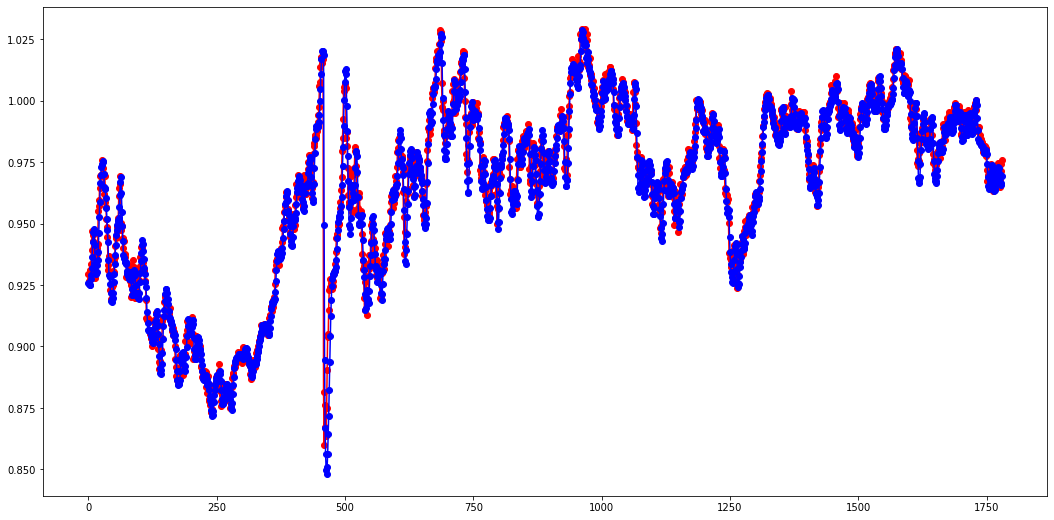

In [12]:
plt.figure(figsize=(18, 9))
plt.plot(test_data[30:], '-ro')
plt.plot(y_hat_inversed, '-bo')

In [13]:
print(train_data[-30:])

[[0.45574898]
 [0.45716162]
 [0.45810145]
 [0.45908449]
 [0.45911179]
 [0.45925069]
 [0.45848396]
 [0.45617049]
 [0.45268217]
 [0.44878814]
 [0.44596946]
 [0.44340978]
 [0.44131186]
 [0.44009825]
 [0.43997776]
 [0.44001794]
 [0.44006553]
 [0.43991401]
 [0.44052076]
 [0.44140981]
 [0.44250719]
 [0.44343768]
 [0.44435514]
 [0.44666709]
 [0.44887359]
 [0.45039071]
 [0.45233918]
 [0.45403564]
 [0.45599689]
 [0.45959121]]


In [14]:
pred_list = []

batch = train_data[-30:].reshape((1, 30, 1))

for i in range(30):
    pred_list.append(model.predict(batch)[0])
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)
    
print(batch.flatten())

[0.45706102 0.45761064 0.45771572 0.45736441 0.45659366 0.45544443
 0.45396081 0.45218861 0.45017105 0.44794881 0.44555983 0.44303852
 0.44041476 0.43771476 0.43496129 0.4321748  0.42937213 0.42656788
 0.4237732  0.42099735 0.41824993 0.41553614 0.41285959 0.41022503
 0.40763077 0.40508074 0.40257517 0.40010625 0.39767897 0.39529201]


In [15]:
#plt.plot(train_data[30:])
plt.plot(batch.flatten(), color='-r')

ValueError: Invalid RGBA argument: '-r'

<Figure size 432x288 with 1 Axes>

In [16]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list), 
                          index=df[-30:].index, columns=['Prediction'])
df_midpt = pd.DataFrame(mid_prices, columns=['Mid-point'])
df_test = pd.concat([df,df_midpt, df_predict], axis=1)
df_test

,date,high,low,open,close,Mid-point,Prediction
0,04/01/1971,4.3180,4.3180,4.3180,4.3180,0.100000,NaN
1,05/01/1971,4.3117,4.3117,4.3117,4.3117,0.189779,NaN
2,06/01/1971,4.3113,4.3113,4.3113,4.3113,0.270566,NaN
3,07/01/1971,4.3103,4.3103,4.3103,4.3103,0.343238,NaN
4,08/01/1971,4.3109,4.3109,4.3109,4.3109,0.408665,NaN
...,...,...,...,...,...,...,...
12805,03/02/2020,0.9671,0.9630,0.9641,0.9659,0.965050,0.928461
12806,04/02/2020,0.9704,0.9654,0.9659,0.9692,0.967900,0.928036
12807,05/02/2020,0.9748,0.9678,0.9692,0.9735,0.971300,0.927618
12808,06/02/2020,0.9757,0.9731,0.9735,0.9748,0.974400,0.927207


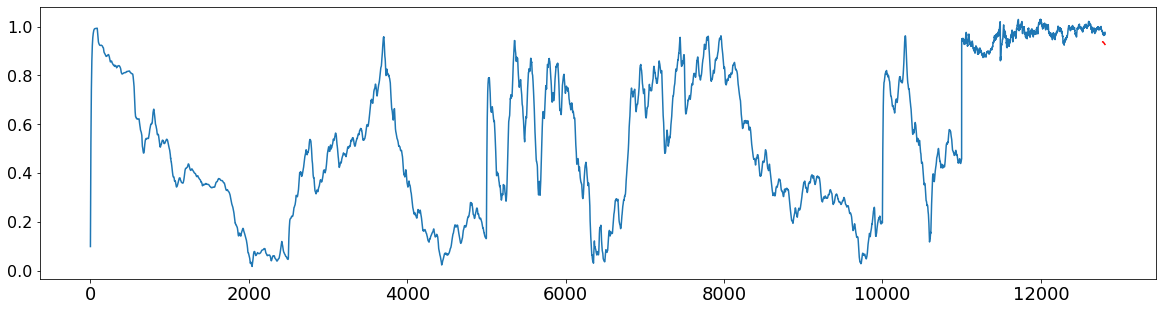

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['Mid-point'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
#plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()


In [18]:
print(len(test_data))
print(len(y_hat_inversed))

1810
1780


In [19]:
y_recent = y_hat_inversed[-31:]
#print(y_recent)
y_recent2 = scaler.fit_transform(y_recent)
recent_generator = TimeseriesGenerator(y_recent2, y_recent2, length=30, batch_size=1)
for i in recent_generator:
    print(i)
# recent_hat = model.predict(recent_generator)
# recent_hat_inversed = scaler.inverse_transform(recent_hat)
# print(recent_hat_inversed)

(array([[[1.        ],
        [0.9098358 ],
        [0.6661148 ],
        [0.33700562],
        [0.10297012],
        [0.0415802 ],
        [0.10687256],
        [0.16298676],
        [0.25608063],
        [0.33726883],
        [0.47190475],
        [0.60033035],
        [0.6279793 ],
        [0.5305824 ],
        [0.32320786],
        [0.07646942],
        [0.        ],
        [0.02468491],
        [0.05451202],
        [0.18465805],
        [0.25528717],
        [0.35343933],
        [0.4144249 ],
        [0.47159576],
        [0.5952301 ],
        [0.5728836 ],
        [0.41845703],
        [0.21270752],
        [0.12960815],
        [0.18776703]]], dtype=float32), array([[0.3534851]], dtype=float32))


In [20]:
model.save('usd_chf.h5') 